# Import essential libraries and fetch the dataset

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingGridSearchCV, learning_curve, cross_val_predict
from tabulate import tabulate
from scipy import stats as st
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, label_binarize
from sklearn.feature_selection import chi2, f_classif, RFE, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, precision_score, classification_report, confusion_matrix

In [2]:
# fetch the dataset and loaded it into a dataframe
framed_data= pd.read_csv("/content/train.csv")
# check the dimension of the training dataframe
print(f"The dimension of the training set is: {framed_data.shape}")

The dimension of the training set is: (14396, 18)


# Take a glance of the data

In [3]:
# statring with some info about data columns
framed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [4]:
# now take a little more look on the data
framed_data.describe()

id    Popularity  danceability        energy           key  \
count  14396.000000  14045.000000  14396.000000  14396.000000  12784.000000   
mean    7197.500000     44.591954      0.542981      0.663347      5.957838   
std     4155.911573     17.436540      0.166668      0.235709      3.190628   
min        0.000000      1.000000      0.059600      0.000020      1.000000   
25%     3598.750000     33.000000      0.430000      0.510000      3.000000   
50%     7197.500000     44.000000      0.545000      0.701000      6.000000   
75%    10796.250000     56.000000      0.659000      0.861000      9.000000   
max    14395.000000    100.000000      0.989000      0.999000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  14396.000000  14396.000000  14396.000000  14396.000000   
mean      -7.897393      0.638580      0.079479      0.246606   
std        4.063214      0.480429      0.083048      0.310371   
min      -39.952000      0.000000      0.022500      0.000000   
25%       -9.525250      0.000000      0.034800      0.004208   
50%       -7.006000      1.000000      0.047400      0.080750   
75%       -5.161000      1.000000      0.082500      0.434000   
max        1.355000      1.000000      0.955000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      10837.000000  14396.000000  14396.000000  14396.000000   
mean           0.177489      0.195594      0.486931    122.729981   
std            0.304133      0.158487      0.240281     29.558253   
min            0.000001      0.013600      0.018300     34.132000   
25%            0.000088      0.097400      0.299000     99.799000   
50%            0.003920      0.129000      0.481000    120.069500   
75%            0.199000      0.257000      0.673000    141.990250   
max            0.996000      1.000000      0.986000    217.416000   

       duration_in min/ms  time_signature         Class  
count        1.439600e+04    14396.000000  14396.000000  
mean         2.009550e+05        3.927341      6.695679  
std          1.118463e+05        0.352828      3.206170  
min          5.339167e-01        1.000000      0.000000  
25%          1.669988e+05        4.000000      5.000000  
50%          2.095845e+05        4.000000      8.000000  
75%          2.522970e+05        4.000000     10.000000  
max          1.477187e+06        5.000000     10.000000

**Discussion Stage**
* There is null values we have to deal with it.
* From the description of the dataset, there is a column we have to ride it out: song id

# Preprocess the data

## Remove some columns from data discussion, maybe for later analysis

In [5]:
# remove useless columns
training_data= framed_data.drop(["id", "Class"], axis = 1)
labeled_data = framed_data["Class"]
# check the shapes
print(f"The dimension of the training set after remove some columns is: {training_data.shape}")
print(f"The dimension of the labeled set after remove some columns is: {labeled_data.shape}")

The dimension of the training set after remove some columns is: (14396, 16)
The dimension of the labeled set after remove some columns is: (14396,)


## Check null values

In [6]:
# check null values
framed_data.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

**Discussion Stage**\
There is a lot of null values and we have to deal with it after some EDA on the data.

## Check duplicated values

In [7]:
# check duplicated values
framed_data_= framed_data.drop(["id"], axis =1)
framed_data_.duplicated().sum()

0

**Discussion Stage**\
There are no duplicated values.

In [8]:
training_data.duplicated().sum()

1151

**Discussion Stage**\
In case of removing ID and Class columns, there is duplicated data

# Quick deal with duplicated

In [9]:
training_data.drop_duplicates(inplace = True)

In [10]:
# recheck the case
training_data.duplicated().sum()

0

In [11]:
framed_data= pd.concat([training_data, labeled_data], axis =1)

# EDA

## Check target class balance

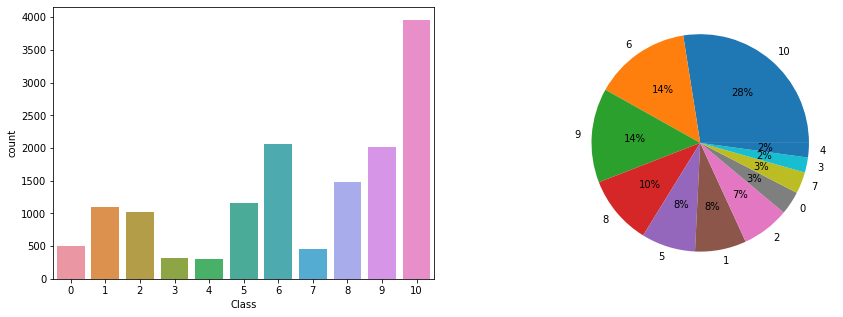

In [12]:
fig, ax= plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x= framed_data['Class'], ax= ax[0])
ax[1].pie(framed_data['Class'].value_counts(), labels= framed_data['Class'].value_counts().index, autopct='%.0f%%')
plt.subplots_adjust()
plt.show()

**Discussion Stage**\
There is unbalanced data, we have to be carefull.

## Check features range

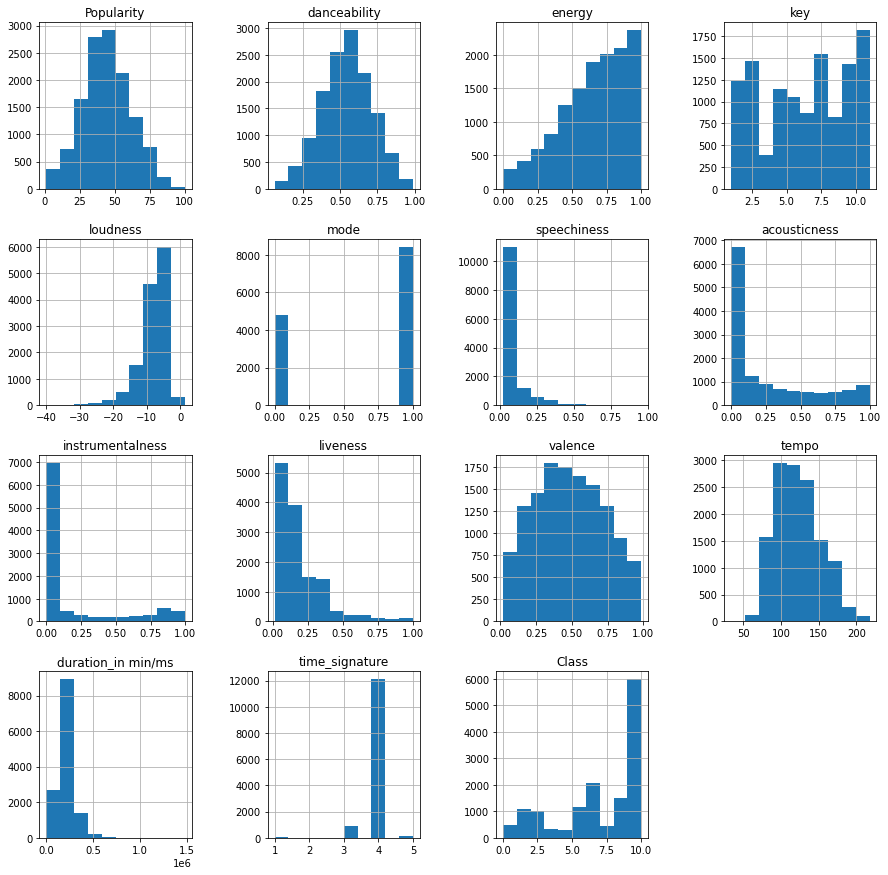

In [13]:
# A histogram plot that represents the ranges of each feature and how many values between each bin
framed_data._get_numeric_data().hist(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

**Discussion Stage**
1. Let's talk about the distribution:
 > * There is a normal distribution of:
 > popularity, danceability, valence, tempo.
 > * There is a left skewed distribution of:
 > speechiness, liveness, duration in milliseconds.
 > * There is a different distribution of the other features.
2. Then we will take a look about the shown point in these features:
 > * There is a *high* count of *recording* songs.
 > * There is a *high* confidence songs represent that the track is *acoustic*.
 > * There is a *high* count of *no vocal* content songs.
 > * There is a *high* count of songs have *Time of the song* between 0.2 and 0.3.
 > * There is a *high* count of songs has *time_signature* is 4.
 > * The class 10 has a lot of value, maybe it cut off the other values and put it as 10.

## Explore some categorical data

In [14]:
# choose the object column names
obj_cols = framed_data.columns[framed_data.dtypes==object]
list(obj_cols)

['Artist Name', 'Track Name']

**Discussion Stage**
* We have two categorical columns **Artist Name** and **Track Name**

In [15]:
# get the number of unique values for each categorical variable
framed_data[obj_cols].nunique()

Artist Name     7891
Track Name     12396
dtype: int64

**Discussion Stage**
* **Artist Name** has 7891 unique value.
* **Track Name** has 12396 unique value.

In [16]:
# show the distribution of Artist Name variable
framed_data['Artist Name'].value_counts()

Backstreet Boys                                      59
Westlife                                             48
Britney Spears                                       43
Eyal Golan                                           42
Omer Adam                                            34
                                                     ..
Smallgod                                              1
Omar Coleman                                          1
Julia Holter                                          1
Arvo Pärt, English Chamber Orchestra, Nigel Short     1
WurlD                                                 1
Name: Artist Name, Length: 7891, dtype: int64

**Discussion Stage**
* The distribution of **Artist Name** is not uniform distribution, which means the **Artist Name** variable affect on the data.

In [17]:
# show the distribution of Track Name variable
framed_data['Track Name'].value_counts()

Dreams                         8
Hurricane                      7
Landslide                      6
Forever                        6
Runaway                        6
                              ..
Crow Killer Blues              1
Knife Under My Pillow          1
Spaceman                       1
Hellbent                       1
Is There Anybody out There?    1
Name: Track Name, Length: 12396, dtype: int64

* The distribution of Track Name converges to uniform distribution.

**Discussion Stage**\
We dealed with convert Object variables to special encoding but after experiment, there is no improvements in the results.

## Check correlation and peak some insights

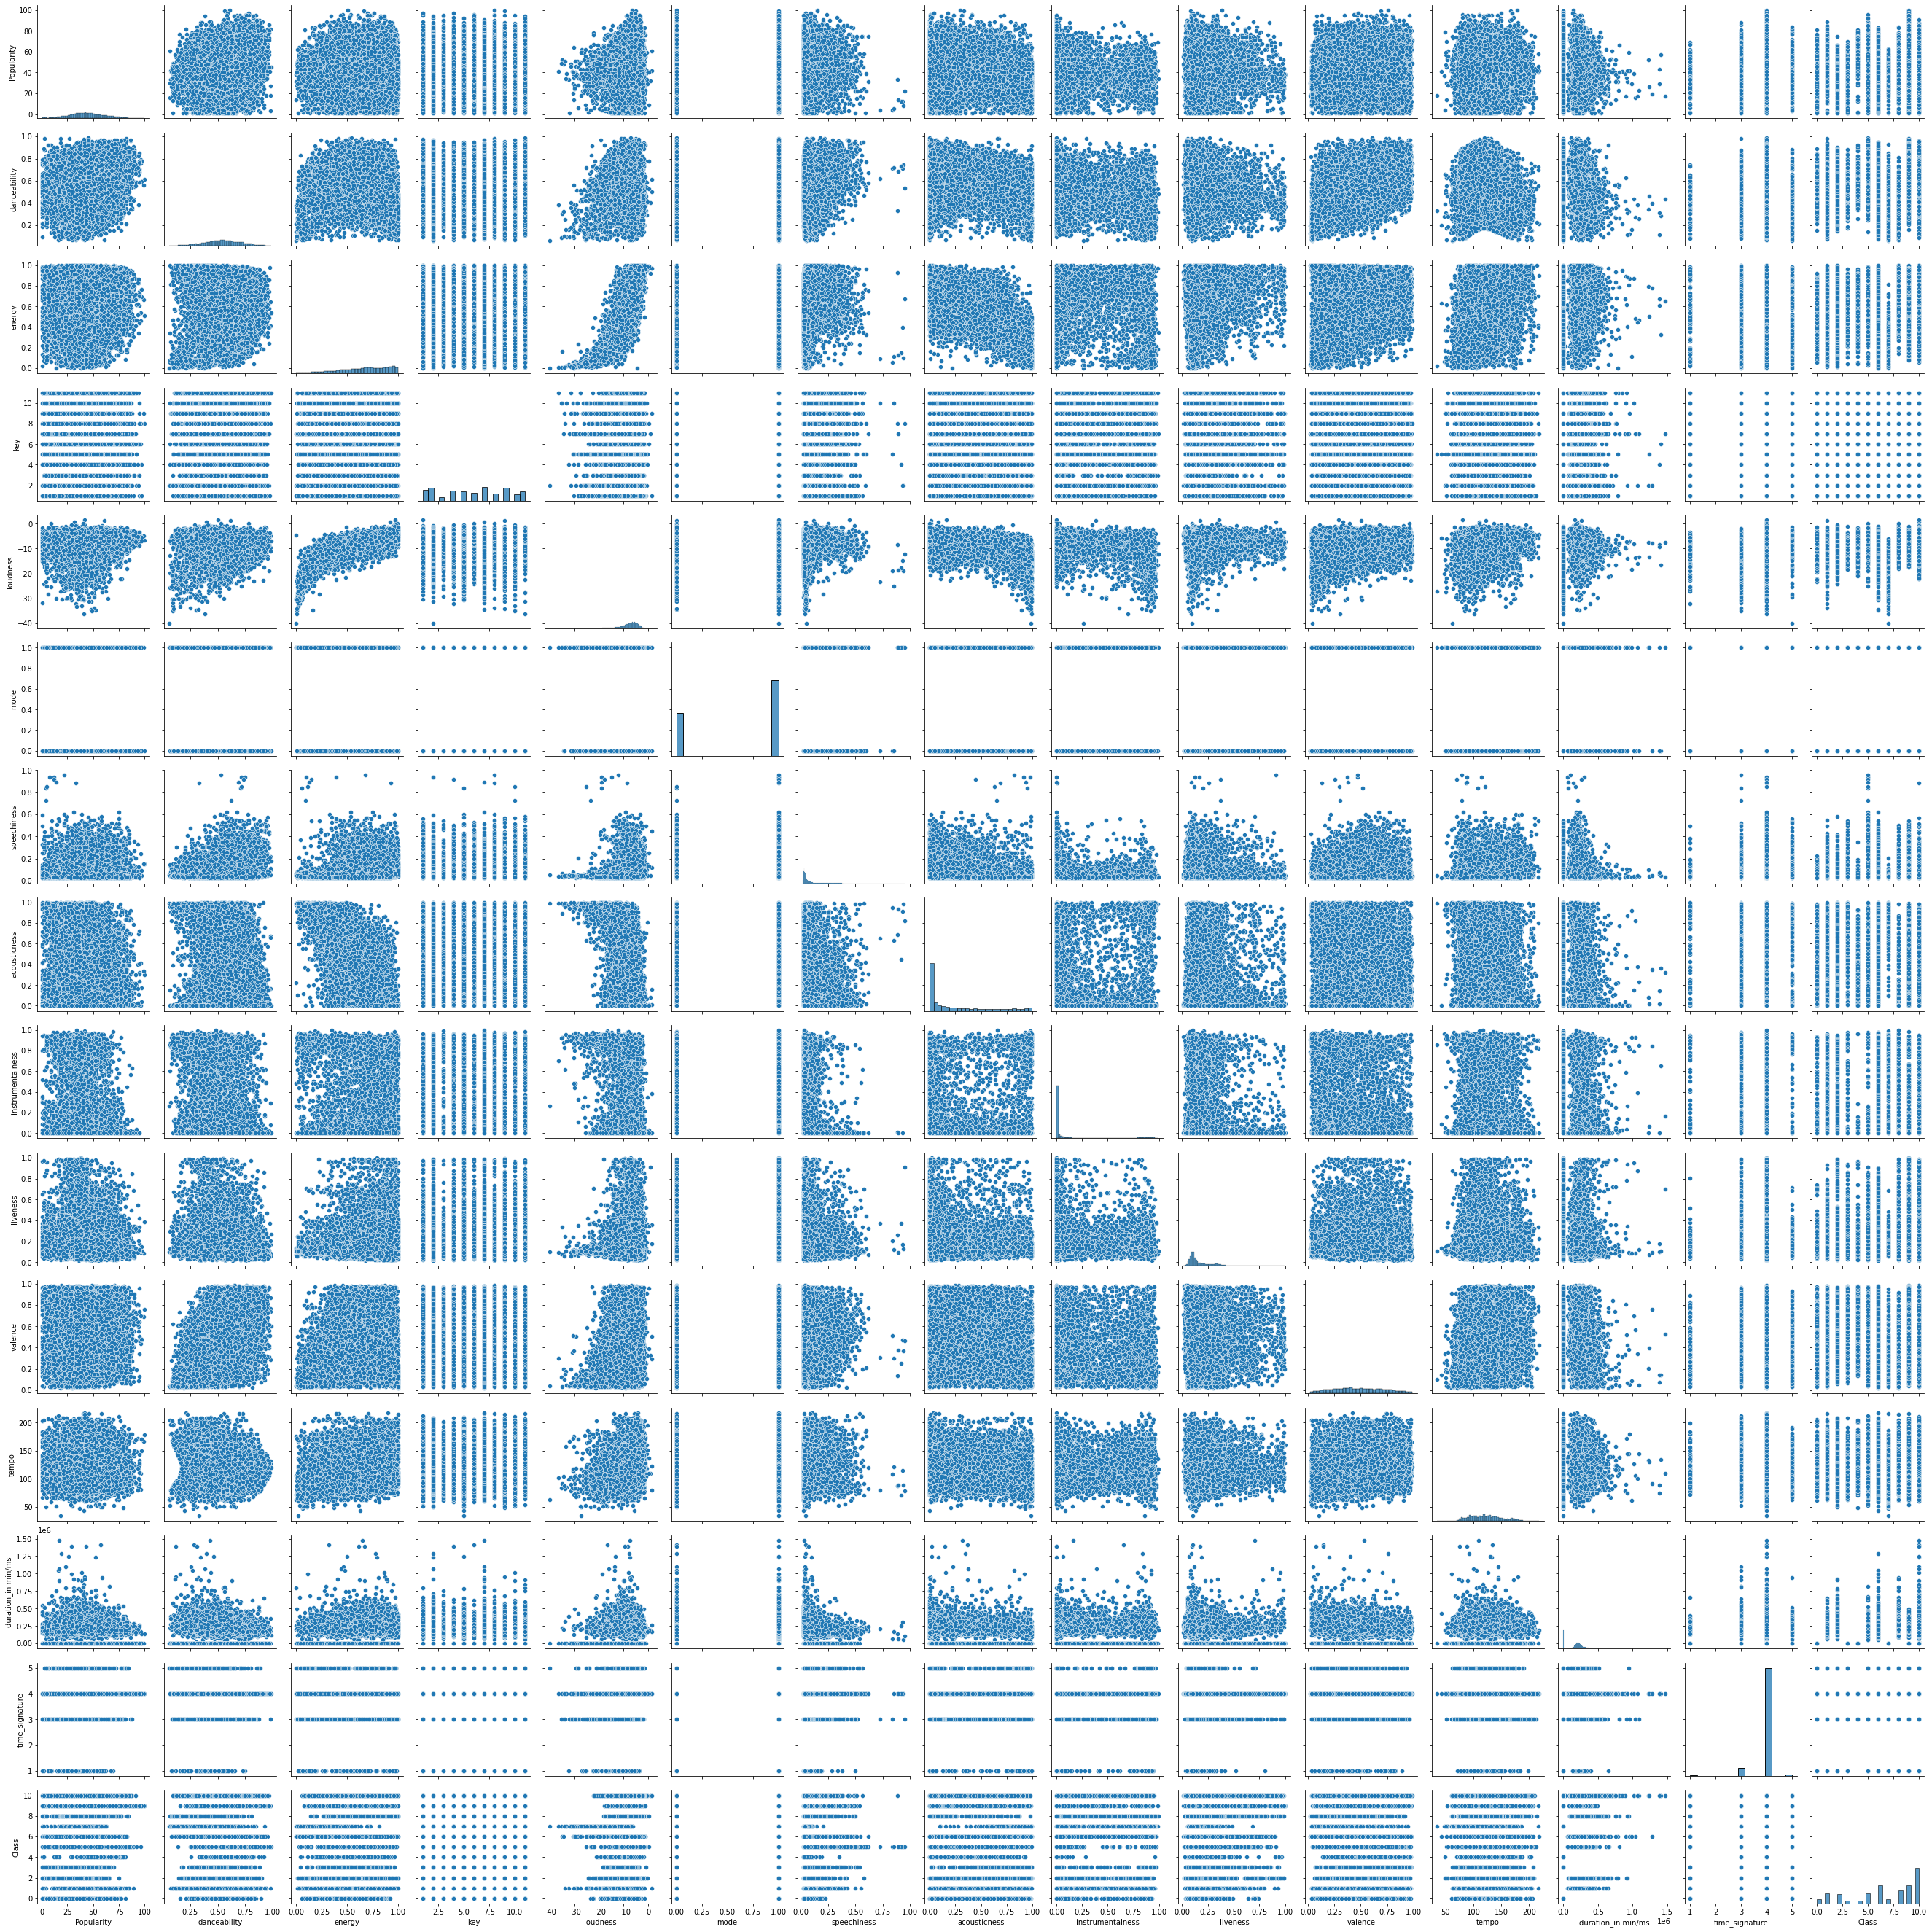

In [18]:
# plot pairplot with the hue of Class target
sns.pairplot(framed_data._get_numeric_data())
plt.show()

## Check correlation using heatmap

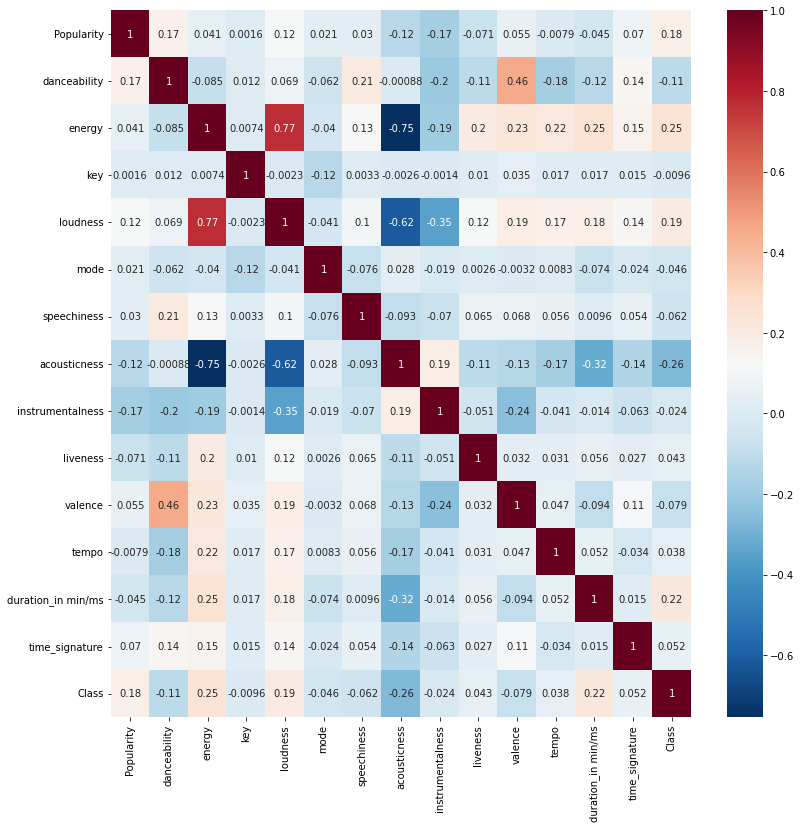

In [19]:
# create the blank figure
plt.figure(figsize= (13, 13))
# plot heatmap between data features (numerical data)
sns.heatmap(framed_data.corr(), annot=True, cmap='RdBu_r')
plt.show()

**Discussion Stage**\
Because of the features affect the target class equavely in low effect, I will try to remove the most low values like: key, mode, speechiness, instrumentalness, liveness, tempo, time_signature.

**Check correlation using heatmap after removing duplicated values**

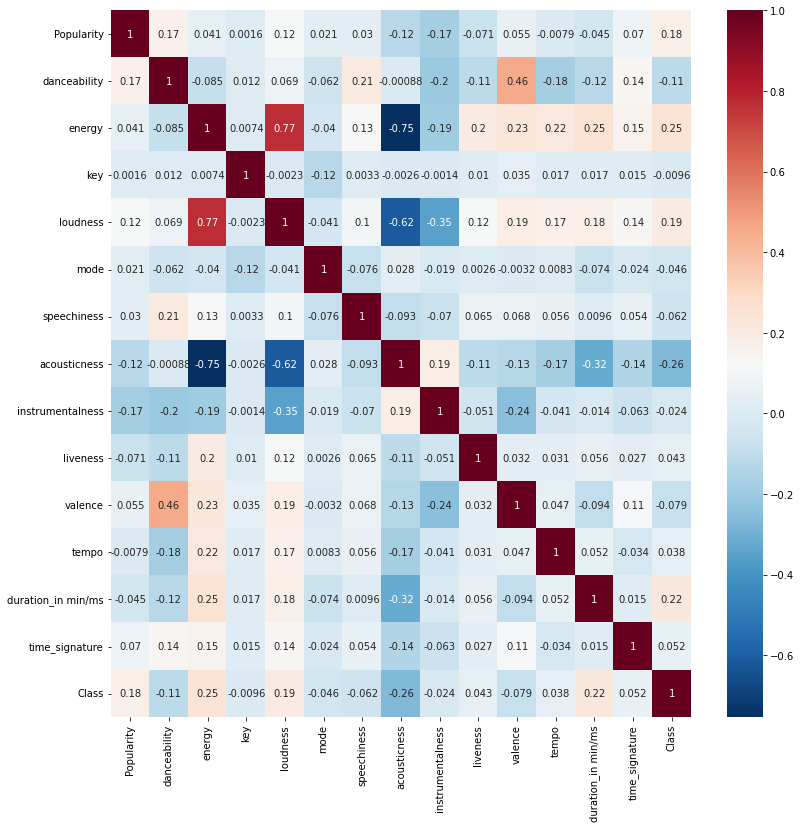

In [20]:
# create the blank figure
plt.figure(figsize= (13, 13))
# plot heatmap between data features (numerical data)
sns.heatmap(framed_data.drop_duplicates(keep= False).corr(), annot=True, cmap='RdBu_r')
plt.show()

## Check outliers

In [21]:
def box_plot(features, data):
    '''
    Plot boxes that describes and determine the outliers in the features.
    Args:
    features-- list of features we want to study their outliers.
    data-- dataframe we want to deal with.
    Returns:
    A plot describe the outliers in the features
    '''
    # create the blank figure
    plt.figure(figsize=(20, 20))
    for index, element in enumerate(features):
        plt.subplot(np.ceil(len(features)/2),2, index+1)
        # plot lines
        # initialize subplots index values
        sns.boxplot(x= element, data= data)
        plt.title(f"Distribution of {element}")
        # set x and y labels
        plt.xlabel(element)
    # adjust height space
    plt.subplots_adjust(wspace= 0.2, hspace = 0.6)
    return plt.show()

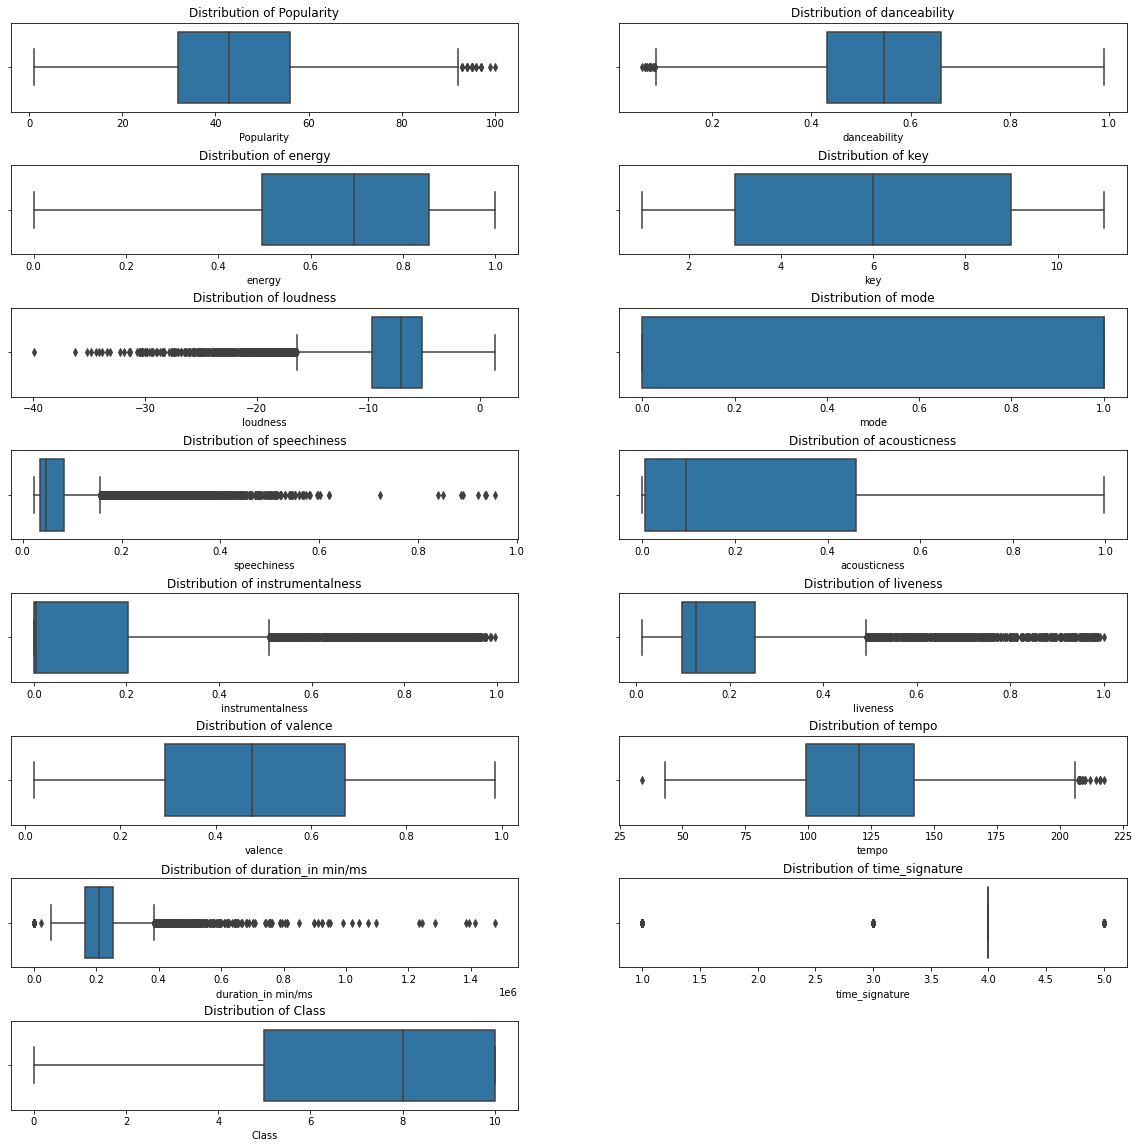


 The shape of train_data is:  (14396, 17)


In [22]:
# initialize numeric features
features= framed_data._get_numeric_data().columns.to_list()
# check the outliers in features
box_plot(features, framed_data)
# check the data shape
print("\n The shape of train_data is: ", framed_data.shape)

**Discussion Stage**
* **popularity**, **danceability**, **instrumentalness** contain outliers, but they are not too far from the rest of the data, so we will  leave them.
* According to the chart above:
    1. the outlier values in **loudness** are smaller than -35.
    2. the outlier values in **speechiness** are greater than 0.7.
    3. the outlier values in **duration_in min/ms** art greater than 1.2 or smaller than the minimum boundary in the boxplot.
    4. the outlier values in **tempo** are smaller than the minimum boundary in the boxplot.

* **speechiness**, **duration in milliseconds** and **loudness** have skewed distribution, so median is better to switch it with outliers.
* **tempo** has normal distribution, so mean is better to switch it with outliers.

# Preprocess Time

### Deal with outliers

In [23]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary
def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False
def replace_with_thresholds_std(dataframe, cols, replace=False):
    data = []
    for col_name in cols:
        if col_name == 'Popularity' or col_name == 'dancability' or col_name == 'valence' or col_name == 'tempo':
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

In [24]:
# get features from data
features= framed_data._get_numeric_data().columns.to_list()
# recheck the outliers in featuers
replace_with_thresholds_std(framed_data, features, replace= True)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ==========  =============  =============
Outlier (Previously)    Outliers      Count  Column        Lower Limit    Upper Limit
======================  ==========  =======  ==========  =============  =============
True                    True              5  Popularity       -8.24965        96.6291
False                   False                valence         -0.239557        1.20726
True                    True              6  tempo             33.3893        211.321
======================  ==========  =======  ==========  =============  =============


In [25]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
  quartile1 = dataframe[col_name].quantile(th1)
  quartile3 = dataframe[col_name].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5 * iqr
  lower_limit = quartile1 - 1.5 * iqr
  return lower_limit, upper_limit
def check_outliers_iqr(dataframe, col_name):
  lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
  if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
      return True
  else: 
      return False
def replace_with_thresholds_iqr(dataframe, cols, th1=0.05, th3=0.95, replace=False):
    data = []
    for col_name in cols:
      if col_name != "Class" or col_name != 'Popularity' or col_name != 'dancability' or col_name != 'valence' or col_name != 'tempo':
        outliers_ = check_outliers_iqr(dataframe, col_name)
        count = None
        lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name, th1, th3)
        if outliers_:
          count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
          if replace: 
              if lower_limit < 0:
                  # We don't want to replace with negative values
                  dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
              else:
                  dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                  dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
          outliers_status = check_outliers_iqr(dataframe, col_name)
          data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)

In [26]:
# get features from data
features= framed_data._get_numeric_data().columns.to_list()
# recheck the outliers in featuers
replace_with_thresholds_iqr(framed_data, features, replace= True)

Removing Outliers using IQR
=======================  ==========  =======  ==================  =============  =============
Outliers (Previously)    Outliers      Count  Column                Lower Limit    Upper Limit
=======================  ==========  =======  ==================  =============  =============
True                     True              0  Popularity                    -71            161
True                     True              0  danceability              -0.5825         1.6615
True                     True              4  loudness                 -34.7942        15.5322
True                     True              9  speechiness               -0.3457         0.6503
True                     True              0  instrumentalness         -1.33799           2.23
True                     True              0  liveness                 -0.62995        1.21445
True                     True              0  tempo                    -65.7931        320.544
True                  

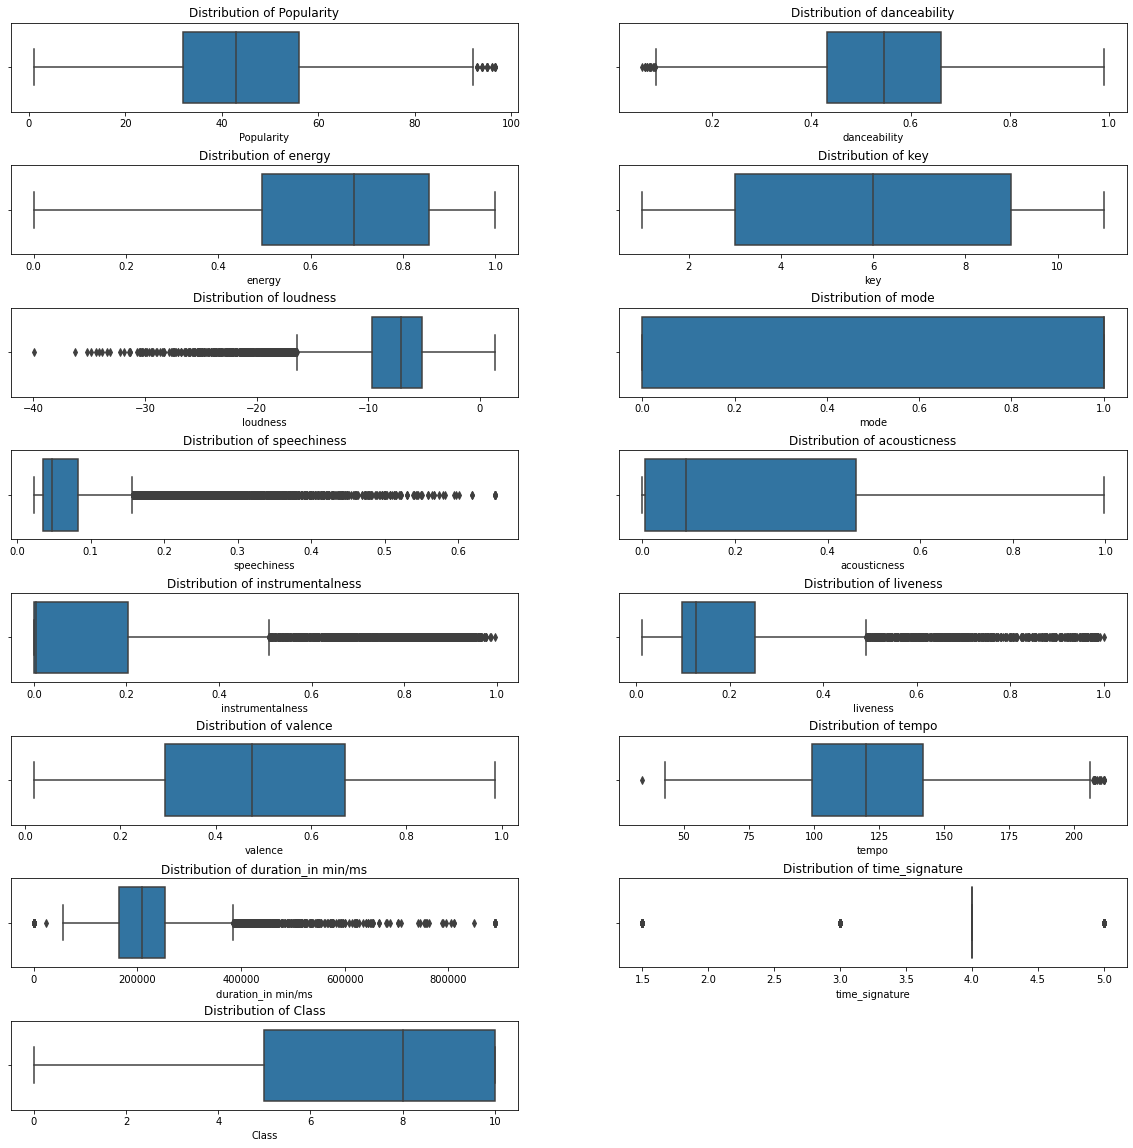


 The shape of train_data is:  (14396, 17)


In [27]:
# initialize numeric features
features= framed_data._get_numeric_data().columns.to_list()
# check the outliers in features
box_plot(features, framed_data)
# check the data shape
print("\n The shape of train_data is: ", framed_data.shape)

## Missing data processing

In [28]:
# Determine the null values:
dfNullVals = framed_data.isnull().sum().to_frame()
dfNullVals = dfNullVals.rename(columns = {0:'Null'})
# Determine the not null values:
dfNotNullVals = framed_data.notna().sum().to_frame()
dfNotNullVals = dfNotNullVals.rename(columns = {0:'Not Null'})
# Combine the dataframes:
dfNullCount = pd.concat([dfNullVals, dfNotNullVals], ignore_index=False, axis=1).reset_index()
dfNullCount = dfNullCount.rename(columns = {'index':'Category'})
# Generate Plot
fig = px.bar(dfNullCount, x="Category", y = ['Not Null', 'Null'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title={'text':"Null Values Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    xaxis_title = "Category",
    yaxis_title = "Count")
fig.update_layout(legend_title_text = 'Status')
fig.show()

**Discussion Stage**\
The above graph tells us that there are three columns with missing values, so we have to process them. We have many ways to address it, but we will discuss three ways:
1. Remove columns or rows that contain them (naive solution)
2. Replace it with the mean or the mean. It will probably make a bias toward these values
3. Estimate them through machine learning model, I think it's the best way.

In [29]:
def replace_null_values(model, dataframe):
    '''
    This function changes nulls with values estimated from the machine learning model.
    Args:
    model-- machine learing model like linear regression.
    dataframe-- The dataframe that we want to process.
    '''
    # build model to estimate missing values in train data. 
    # Specify the column names that contain null values.
    null_col = dataframe._get_numeric_data().columns[dataframe._get_numeric_data().isnull().any()]
    # Specify the columns the model will train on.
    columns_space = list(set(dataframe.columns[dataframe.dtypes!=object]) - set(null_col))
    for col in null_col: 
        # get null values index.
        bool_null = dataframe[col].isnull() 
        idx_null = dataframe[bool_null].index
        # get non null values index.
        idx_non_null =  dataframe[~bool_null].index
        # Select the highest three correlations with target variable.
        pred_col = dataframe[columns_space + [col]].corr()[col].abs().sort_values(ascending=False)[1:4].index 
        # train model on drop_train.
        x = dataframe.loc[idx_non_null, pred_col]
        y = dataframe.loc[idx_non_null, col]
        rg = model.fit(x, y)    
        # put predicted values in missing values' place.
        dataframe.loc[idx_null, col] = rg.predict(dataframe.loc[idx_null,pred_col])
    return dataframe

In [30]:
# choose one the three models to estimate missing data
framed_data= replace_null_values(KNeighborsRegressor(n_neighbors= 9), framed_data)
# recheck null values
display(framed_data.isnull().sum())

Artist Name           1151
Track Name            1151
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

**Discussion Stage**\
The object feature here will help us as a place holder of duplicated  ( founded without id and class) values to delete it.

In [31]:
framed_data.dropna(inplace = True)
# recheck the case
framed_data.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

### Recheck the effect on independent and dependent variables

In [32]:
framed_data.corr()["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.245605
duration_in min/ms    0.225203
loudness              0.192484
Popularity            0.178740
time_signature        0.053058
liveness              0.043395
tempo                 0.037951
instrumentalness     -0.016386
key                  -0.020729
mode                 -0.046322
speechiness          -0.061870
valence              -0.078704
danceability         -0.109743
acousticness         -0.263807
Name: Class, dtype: float64

**Discussion Stage**\
There is some improvement in correlation, but is is still bad for linear models.

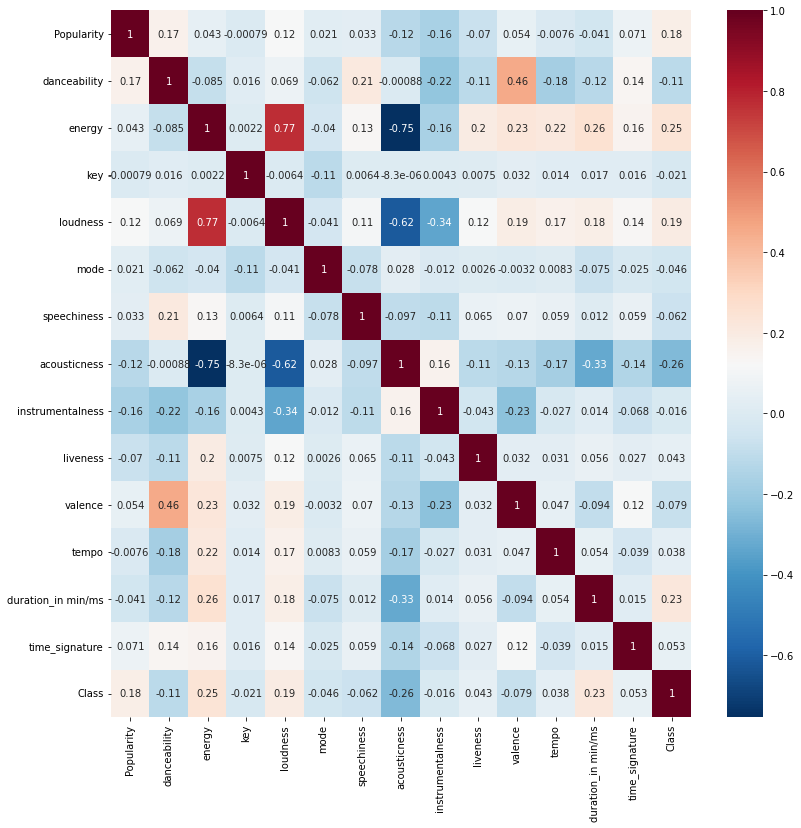

In [33]:
# create the blank figure
plt.figure(figsize= (13, 13))
# plot heatmap between data features (numerical data)
sns.heatmap(framed_data.corr(), annot=True, cmap='RdBu_r')
plt.show()

**Discussion Stage**\
Heatmap here will discuss the correlation between features only.

## Split data into training and validation set

In [34]:
# split the data using stratified split
X_train, X_val, y_train, y_val= train_test_split(framed_data.iloc[:, :-1], framed_data.iloc[:, -1], random_state= 42, stratify= framed_data.iloc[:, -1])

In [35]:
# check the data shape
print(f"\nThe shape of X_train is: {X_train.shape}, and the shape of y_train is: {y_train.shape}\nThe shape of X_test shape is: {X_val.shape}, and the shape of y_test is: {y_val.shape}")


The shape of X_train is: (9933, 16), and the shape of y_train is: (9933,)
The shape of X_test shape is: (3312, 16), and the shape of y_test is: (3312,)


## Processing imbalanced target in data

In [36]:
y_train.value_counts()

10    2718
9     1438
6     1331
8     1055
5      852
2      740
1      605
0      374
7      346
3      241
4      233
Name: Class, dtype: int64

**Discussion Stage**
* As we saw, there is a huge difference between the frequent of classes.
* We try to handle Imbalanced Data through upsampling by remove some samples from 10 class and make changes on 0, 3, 4 and 7 but no improvement happened (cause overfit).

In [37]:
# remove 1000 random example from the data
rus = RandomUnderSampler(sampling_strategy= {9: 1100, 6: 1100, 10: 1100})
X_resampled, y_resampled = rus.fit_resample(X_train,y_train)

In [38]:
y_resampled.value_counts()

6     1100
9     1100
10    1100
8     1055
5      852
2      740
1      605
0      374
7      346
3      241
4      233
Name: Class, dtype: int64

## Shuffle data

In [39]:
# for convenient naming I will rename it to the original split name
X_train, y_train = X_resampled, y_resampled
# create shuffle seed
shuffle_index = np.random.permutation(len(X_train))
# shuffle samples
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

**Discussion Stage**\
We tried to improve the model by using PCA but no improvements happened.

# Final step before training

In [40]:
# set final training data
training_data= X_train
# build final labels of the training set
data_labels= y_train.ravel()
# get numerical attributes
numerical_attribs = list(training_data.select_dtypes(exclude='object'))
# get categorical attributes
categorical_attribs = list(training_data.select_dtypes(include='object'))

In [41]:
# add time signature to categorical data
categorical_attribs+=['time_signature']
categorical_attribs

['Artist Name', 'Track Name', 'time_signature']

In [42]:
class CategoricalAttributesConverter(BaseEstimator, TransformerMixin):
    def return_features_name(self):
      return self.get_feature_names_
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
      X.drop(["Artist Name", 'Track Name'], axis= 1, inplace= True)
      return X

**Discussion Stage**\
This class used to deal with categorical features.

In [43]:
class MissingValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return  self # nothing else to do.
    def transform(self, X, y=None):
        return replace_null_values(KNeighborsRegressor(n_neighbors= 9), X) # pocess the null values.

In [44]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    get_feature_names_= []
    def return_features_name(self):
      return self.get_feature_names_
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # feature engineering 
        if 'id' in X.columns:
          X.drop(['id', 'Popularity', 'tempo', 'time_signature', 'key', 'liveness', 'valence'], axis =1, inplace= True)
        else:
          X.drop(['Popularity', 'tempo', 'time_signature', 'key', 'liveness', 'valence'], axis =1, inplace= True)
        self.get_feature_names_+=['danceability',	'energy', 'loudness',	'mode', 'speechiness', 'acousticness', 'instrumentalness', 'duration_in min/ms']
        return X

**Discussion Stage**\
Features remove depends on the later analyses

In [45]:
cat_pipline = Pipeline([
  ("categorical", CategoricalAttributesConverter()),
  ("missing_values", SimpleImputer(strategy='median')),
  ("onehotendoer", OneHotEncoder(handle_unknown='ignore', sparse=False))
])
num_pipeline = Pipeline([
  ("missing_values", MissingValues()),
  ('feature_eng', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
])

**Discussion Stage**\
We tried MinMax Scaler and Rubost Scaler, also scaler some of it MixMax and some of it on Standard scaler and the rest without scaling depends on its distribution, but finally we found that Standard Scaler was the best on all variables.

In [46]:
# combine all transformer together.
full_pipeline = ColumnTransformer([
 ("numerical", num_pipeline, numerical_attribs),
 ("categorical",cat_pipline, categorical_attribs),
])

In [47]:
data_prepared = full_pipeline.fit_transform(training_data)
data_prepared.shape

(7746, 12)

In [48]:
# for later user I will convert it to dataframe
data_prepared_df = pd.DataFrame(data=data_prepared, columns= num_pipeline.named_steps["feature_eng"].return_features_name() + ['0', '1', '2', '3'] )
data_prepared_df

danceability    energy  loudness      mode  speechiness  acousticness  \
0        -0.624620  0.490729  0.666066  0.765927    -0.473301     -0.737251   
1        -1.681038  0.816333  0.272852  0.765927    -0.330573     -0.859319   
2        -0.332791  1.089026  0.609794  0.765927     0.069514     -0.857451   
3         0.239192  0.873314 -0.026036 -1.305607     2.853269     -0.833896   
4        -0.122675  0.124424 -1.057618  0.765927    -0.604791      0.575930   
...            ...       ...       ...       ...          ...           ...   
7741     -1.470922 -0.384333  0.678751 -1.305607    -0.585685     -0.489060   
7742     -0.163531  0.433748 -0.306245  0.765927    -0.585685     -0.859290   
7743      0.157480 -0.583765 -0.019348 -1.305607    -0.556466     -0.238114   
7744      0.064095 -1.389636 -0.730132  0.765927    -0.602543      1.702126   
7745      1.015456 -0.416893  0.042690  0.765927    -0.528369     -0.734497   

      instrumentalness  duration_in min/ms    0    1    2    3  
0            -0.603253            0.627816  0.0  0.0  1.0  0.0  
1             2.122424            1.259286  0.0  0.0  1.0  0.0  
2            -0.604353            0.231907  0.0  0.0  1.0  0.0  
3            -0.604157           -0.281553  0.0  0.0  1.0  0.0  
4            -0.597301           -0.447754  0.0  0.0  1.0  0.0  
...                ...                 ...  ...  ...  ...  ...  
7741         -0.260350            0.885739  0.0  1.0  0.0  0.0  
7742          2.445703            0.570938  0.0  0.0  1.0  0.0  
7743         -0.260350            0.337780  0.0  0.0  1.0  0.0  
7744         -0.603861           -1.651315  0.0  0.0  1.0  0.0  
7745         -0.555520            0.925735  0.0  0.0  1.0  0.0  

[7746 rows x 12 columns]

**Discussion Stage**\
Convert data to dataframe for better understand of correlation

In [49]:
X_val_prepared = full_pipeline.transform(X_val)
X_val_prepared.shape

(3312, 12)

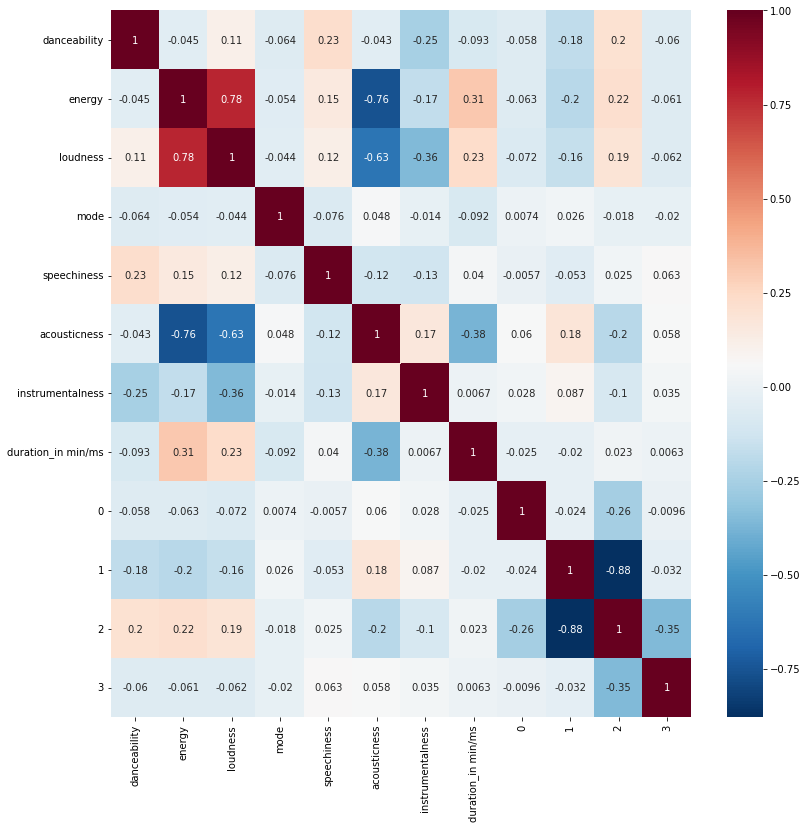

In [50]:
# create the blank figure
plt.figure(figsize= (13, 13))
# plot heatmap between data features (numerical data)
sns.heatmap(data_prepared_df.corr(), annot=True, cmap='RdBu_r')
plt.show()

# Model training time

**Beside basic evaluation, we also have to evaluation using Cross-Validation and learning curve to better evaluate our models**

In [51]:
def cross_val(name, model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5):
  '''
  Prints the evaluation values.
  Args:
  name-- str type represents the name of the estimator.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  # create an instance of the model in cross_val_score and initialize it.
  model_cross_val= cross_val_score(estimator= model,
                            X= X, y= y,
                            scoring= scoring, cv= cv)
  # display the basic results of cross validation step
  print('''
  {name} Classification Cross Validation Mean Result is: {mean}\n\
  {name} Classification Cross Validation Standard Deviation Result is: {std}\n\
  {name} Classification Cross Validation Score Result is:\n{score}'''.format(name= name, mean= model_cross_val.mean(), std= model_cross_val.std(), score= model_cross_val))

In [52]:
def learning_plot(name, model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5):
  '''
  Prints the evaluation values.
  Args:
  name-- str type represents the name of the estimator.
  model-- the model we want to evaluate by.
  X-- training data.
  Y-- labeled data.
  scoring-- scoring metric.
  cv-- int describe the number of kfolds.
  Returns:
  The evaluation metric of the model.
  '''
  train_sizes = [516, 1036, 2361, 3500, 4700, 5736, 6000]
  train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X,
    y = y, train_sizes = train_sizes, cv = cv,
    scoring = scoring)
  # training scores
  plt.style.use('seaborn')
  train_scores_mean = train_scores.mean(axis = 1)
  validation_scores_mean = validation_scores.mean(axis = 1)
  # plot training scores
  plt.plot(train_sizes, train_scores_mean, label = 'Training error')
  # plot validation scores
  plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
  # plot ylabel
  plt.ylabel('F1 score', fontsize = 14)
  # plot xlabel
  plt.xlabel('Training set size', fontsize = 14)
  # plot title
  plt.title(f'Learning curves of a {name} Classification model', fontsize = 18, y = 1.03)
  plt.legend()
  return plt.show()

In [53]:
def error_analysis(model, x, y):
    ''' this function show the confusion matrix of the model
    and the error the model make 
    Arge:
    model: model we want to use
    x: training data
    y: testing data
    '''
    # got predicted values
    y_pred = cross_val_predict(model, x, y, cv=3)
    # got confusion matrix
    conf_mx = confusion_matrix(y, y_pred)
    # show the matrix 
    plt.figure(figsize= (10, 10))
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.grid(False)
    plt.title("Confusion Matrix")
    plt.xlabel("Ture Class")
    plt.ylabel("Predicted Class")

    # got sum each row in confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    # divide each value by the corresponding sum
    norm_conf_mx = conf_mx / row_sums
    # fill diagonal in confusion matrix
    np.fill_diagonal(norm_conf_mx, 0)
    # show the matrix 
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.grid(False)
    plt.title("error ratio")
    plt.xlabel("Ture Class")
    plt.ylabel("Predicted Class")
    return plt.show()

## Algorithms

### Decision Tree Classifier model

In [54]:
# create an object of the Decision Tree Classifier class
tree_obj = OneVsOneClassifier(DecisionTreeClassifier(max_depth=3, max_features= 6, random_state= 42))
# fit the training data on the training set
tree_model= tree_obj.fit(data_prepared, data_labels)
# compute the f1 score
tree_score = f1_score(data_labels, tree_model.predict(data_prepared), average= "weighted")
tree_score

0.45565412424969276

In [55]:
# Evaluation using Cross-Validation
cross_val("Decision Tree", tree_obj)


  Decision Tree Classification Cross Validation Mean Result is: 0.42545851753907443
  Decision Tree Classification Cross Validation Standard Deviation Result is: 0.01312678839210825
  Decision Tree Classification Cross Validation Score Result is:
[0.43775369 0.43321918 0.42610381 0.42986395 0.40035196]


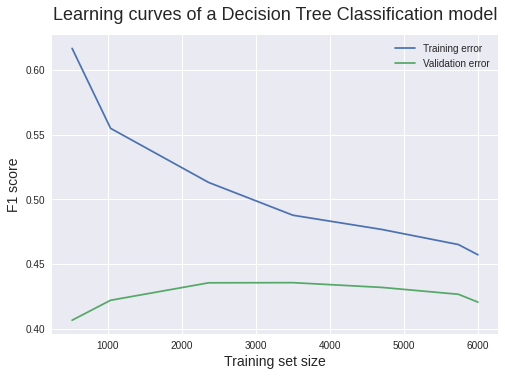

In [56]:
# Evaluation using learning curve
learning_plot("Decision Tree", tree_obj, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 10)

**Discussion Stage**\
There is No overfit using Decision Tree Classifier.

In [57]:
# for better evaluation I will use classification report
print(classification_report(data_labels, tree_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       374
           1       0.00      0.00      0.00       605
           2       0.52      0.16      0.25       740
           3       0.54      0.64      0.59       241
           4       0.59      0.64      0.61       233
           5       0.71      0.77      0.74       852
           6       0.30      0.33      0.31      1100
           7       0.88      0.88      0.88       346
           8       0.62      0.70      0.66      1055
           9       0.35      0.56      0.43      1100
          10       0.35      0.37      0.36      1100

    accuracy                           0.48      7746
   macro avg       0.50      0.51      0.49      7746
weighted avg       0.46      0.48      0.46      7746



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [58]:
# Check accuracy on validation set
tree_test_score= f1_score(y_val, tree_model.predict(X_val_prepared), average= "weighted")
# save results in csv file
results_in_csv= pd.DataFrame(data= [["Decision Tree", tree_score, tree_test_score]], columns =["Algorithm", "F1 train score", "F1 test score"])
tree_test_score

0.4150066611688919

In [59]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007

### Random Forest Classifier model

In [60]:
# create an object the of Random Forest Classifier
forest_obj = OneVsOneClassifier(RandomForestClassifier(n_estimators= 100, max_depth= 2, random_state= 42, max_features= 5))
# fit the training data on the training set
forest_model= forest_obj.fit(data_prepared, data_labels)
# compute the f1 score
forest_score = f1_score(data_labels, forest_model.predict(data_prepared), average= "weighted")
forest_score

0.5375122028200913

In [61]:
# Evaluation using Cross-Validation
cross_val("Random Forest", forest_obj)


  Random Forest Classification Cross Validation Mean Result is: 0.5181460512428625
  Random Forest Classification Cross Validation Standard Deviation Result is: 0.011978330166608197
  Random Forest Classification Cross Validation Score Result is:
[0.52803912 0.52241824 0.51984532 0.525585   0.49484257]


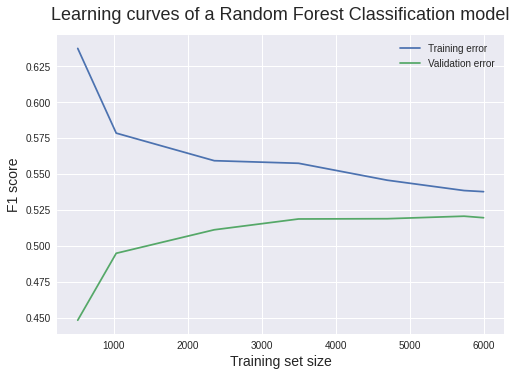

In [62]:
# Evaluation using learning curve
learning_plot("Random Forest", forest_obj, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Random Forest Classifier

In [63]:
# for better evaluation I will use classification report
print(classification_report(data_labels, forest_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.61      0.78      0.69       374
           1       1.00      0.00      0.00       605
           2       0.38      0.37      0.38       740
           3       0.88      0.44      0.58       241
           4       0.77      0.65      0.71       233
           5       0.82      0.72      0.77       852
           6       0.47      0.45      0.46      1100
           7       0.93      0.91      0.92       346
           8       0.64      0.74      0.69      1055
           9       0.48      0.71      0.58      1100
          10       0.42      0.47      0.45      1100

    accuracy                           0.56      7746
   macro avg       0.67      0.57      0.56      7746
weighted avg       0.61      0.56      0.54      7746



In [64]:
# save results in csv file
forest_test_score = f1_score(y_val, forest_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["Random Forest"],  "F1 train score": [forest_score], "F1 test score": [forest_test_score]}), ignore_index = True)

In [65]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242

### Extra Trees Classifier

In [66]:
# create an object the of Extra Tree Classifier
extra_obj = ExtraTreesClassifier(n_estimators= 100, max_depth= 6, random_state= 42)
# fit the training data on the training set
extra_model= extra_obj.fit(data_prepared, data_labels)
# compute the f1 score
extra_score = f1_score(data_labels, extra_model.predict(data_prepared), average= "weighted")
extra_score

0.46024073389137593

In [67]:
# Evaluation using Cross-Validation
cross_val("Extra Trees", extra_obj)


  Extra Trees Classification Cross Validation Mean Result is: 0.4397426107974446
  Extra Trees Classification Cross Validation Standard Deviation Result is: 0.01704930274840937
  Extra Trees Classification Cross Validation Score Result is:
[0.4437772  0.45574438 0.43523231 0.45478514 0.40917402]


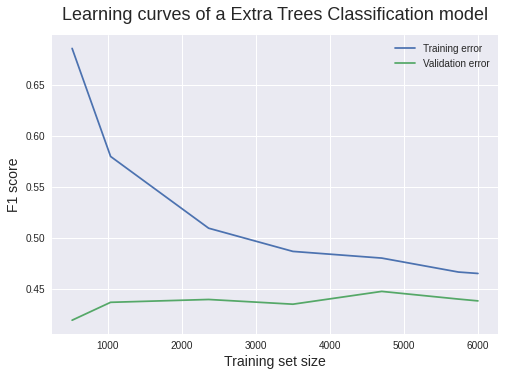

In [68]:
# Evaluation using learning curve
learning_plot("Extra Trees", extra_obj, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

In [69]:
# for better evaluation I will use classification report
print(classification_report(data_labels, extra_obj.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.55      0.68      0.61       374
           1       0.00      0.00      0.00       605
           2       0.53      0.25      0.34       740
           3       0.91      0.28      0.43       241
           4       1.00      0.03      0.06       233
           5       0.72      0.73      0.73       852
           6       0.53      0.36      0.43      1100
           7       0.77      0.93      0.84       346
           8       0.52      0.86      0.65      1055
           9       0.37      0.68      0.48      1100
          10       0.34      0.33      0.34      1100

    accuracy                           0.50      7746
   macro avg       0.57      0.47      0.45      7746
weighted avg       0.50      0.50      0.46      7746



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Discussion Stage**\
There is No overfit using Extra Tree Classifier.

In [70]:
# save results in csv file
extra_test_score = f1_score(y_val, extra_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["Extra Trees"],  "F1 train score": [extra_score], "F1 test score": [extra_test_score]}), ignore_index = True)

In [71]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242
2    Extra Trees        0.460241       0.412151

### KNN Classifier model

In [72]:
# create an object the of KNN Classifier
knn_obj = OneVsOneClassifier(KNeighborsClassifier(p= 1, n_neighbors= 7))
# fit the training data on the training set
knn_model= knn_obj.fit(data_prepared, data_labels)
# compute the f1 score
knn_score = f1_score(data_labels, knn_model.predict(data_prepared), average= "weighted")
knn_score

0.5809363343401369

In [73]:
# Evaluation using Cross-Validation
cross_val("KNeighbors", knn_obj)


  KNeighbors Classification Cross Validation Mean Result is: 0.4849464758966661
  KNeighbors Classification Cross Validation Standard Deviation Result is: 0.016419231936757227
  KNeighbors Classification Cross Validation Score Result is:
[0.48744255 0.50988223 0.49193818 0.47400207 0.46146734]


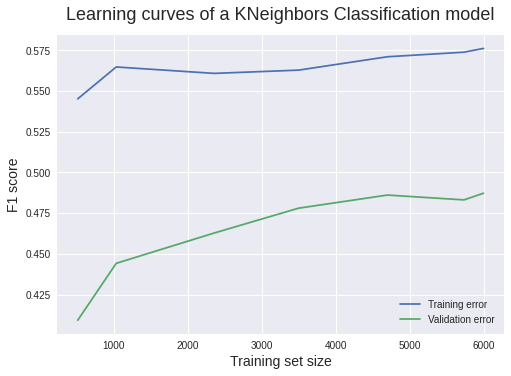

In [74]:
# Evaluation using learning curve
learning_plot("KNeighbors", knn_obj, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is an overfit using KNN Classifier

In [75]:
# for better evaluation I will use classification report
print(classification_report(data_labels, knn_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.65      0.73      0.68       374
           1       0.41      0.20      0.27       605
           2       0.55      0.42      0.48       740
           3       0.71      0.61      0.66       241
           4       0.61      0.72      0.66       233
           5       0.72      0.79      0.75       852
           6       0.51      0.47      0.49      1100
           7       0.88      0.92      0.90       346
           8       0.62      0.83      0.71      1055
           9       0.58      0.64      0.61      1100
          10       0.47      0.45      0.46      1100

    accuracy                           0.59      7746
   macro avg       0.61      0.62      0.61      7746
weighted avg       0.58      0.59      0.58      7746



In [76]:
# save results in csv file
knn_test_score = f1_score(y_val, knn_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["KNN"],  "F1 train score": [knn_score], "F1 test score": [knn_test_score]}), ignore_index = True)

In [77]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242
2    Extra Trees        0.460241       0.412151
3            KNN        0.580936       0.440516

### SVC Classifier model

In [78]:
# create an object the of SVC Classifier
svc_obj = SVC(kernel='rbf', decision_function_shape= 'ovo')
# fit the training data on the training set
svc_model= svc_obj.fit(data_prepared, data_labels)
# compute the f1 score
svc_score = f1_score(data_labels, svc_model.predict(data_prepared), average= "weighted")
svc_score

0.5140182039880514

In [79]:
# Evaluation using Cross-Validation
cross_val("SVC", svc_obj)


  SVC Classification Cross Validation Mean Result is: 0.4904709329110786
  SVC Classification Cross Validation Standard Deviation Result is: 0.015162668532880152
  SVC Classification Cross Validation Score Result is:
[0.50005568 0.50491249 0.49701448 0.48820582 0.4621662 ]


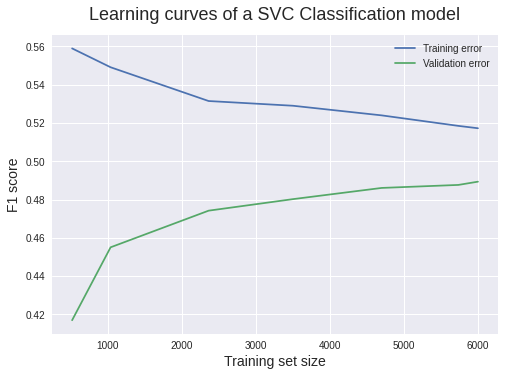

In [80]:
# Evaluation using learning curve
learning_plot("SVC", svc_obj, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is an overfit using SVC Classifier using linear kernal, but from the plot I see that if I get a big data it will result in better accuracy.

In [81]:
# for better evaluation I will use classification report
print(classification_report(data_labels, svc_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       374
           1       0.88      0.01      0.02       605
           2       0.43      0.36      0.39       740
           3       0.74      0.54      0.63       241
           4       0.60      0.64      0.62       233
           5       0.71      0.73      0.72       852
           6       0.53      0.39      0.45      1100
           7       0.93      0.91      0.92       346
           8       0.61      0.82      0.70      1055
           9       0.46      0.58      0.51      1100
          10       0.33      0.41      0.37      1100

    accuracy                           0.54      7746
   macro avg       0.62      0.56      0.55      7746
weighted avg       0.57      0.54      0.51      7746



In [82]:
# save results in csv file
svc_test_score = f1_score(y_val, svc_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["SVC"],  "F1 train score": [svc_score], "F1 test score": [svc_test_score]}), ignore_index = True)

In [83]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242
2    Extra Trees        0.460241       0.412151
3            KNN        0.580936       0.440516
4            SVC        0.514018       0.469759

### Naive Bayes Classsifier model

In [84]:
# create an object the of GaussianNB Classifier
nb_obj = GaussianNB()
# fit the training data on the training set
nb_model= nb_obj.fit(data_prepared, data_labels)
# compute the f1 score
nb_score = f1_score(data_labels, nb_model.predict(data_prepared), average= "weighted")
nb_score

0.41139032496637223

In [85]:
# Evaluation using Cross-Validation
cross_val("GaussianNB", nb_model)


  GaussianNB Classification Cross Validation Mean Result is: 0.401509465430096
  GaussianNB Classification Cross Validation Standard Deviation Result is: 0.015220744919530037
  GaussianNB Classification Cross Validation Score Result is:
[0.40835106 0.40920943 0.40261713 0.41523227 0.37213743]


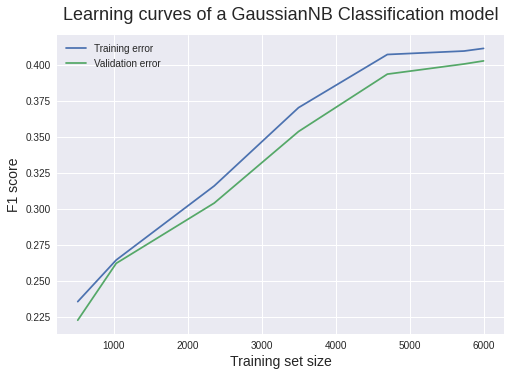

In [86]:
# Evaluation using learning curve
learning_plot("GaussianNB", nb_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is no overfit using Gaussian NB

In [87]:
# for better evaluation I will use classification report
print(classification_report(data_labels, nb_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.77      0.32      0.45       374
           1       0.00      0.00      0.00       605
           2       0.33      0.29      0.31       740
           3       0.52      0.12      0.19       241
           4       0.26      0.99      0.41       233
           5       0.71      0.63      0.67       852
           6       0.52      0.25      0.34      1100
           7       0.92      0.88      0.90       346
           8       0.51      0.79      0.62      1055
           9       0.33      0.52      0.41      1100
          10       0.28      0.27      0.27      1100

    accuracy                           0.44      7746
   macro avg       0.47      0.46      0.41      7746
weighted avg       0.44      0.44      0.41      7746



In [88]:
# save results in csv file
nb_test_score = f1_score(y_val, nb_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["GaussianNB"],  "F1 train score": [nb_score], "F1 test score": [nb_test_score]}), ignore_index = True)

In [89]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242
2    Extra Trees        0.460241       0.412151
3            KNN        0.580936       0.440516
4            SVC        0.514018       0.469759
5     GaussianNB        0.411390       0.358697

### XGBoost Classsifier model

In [90]:
# create an object the of XGBoost Classifierclass
xgb_obj = OneVsOneClassifier(XGBClassifier(learning_rate= 0.03, max_depth=2, subsample= 0.25, n_estimators= 90, random_state= 42))
# fit the training data on the training set
xgb_model= xgb_obj.fit(data_prepared, data_labels)
# compute the f1 score
xgb_score = f1_score(data_labels, xgb_model.predict(data_prepared), average= "weighted")
xgb_score

0.5878926959917251

In [91]:
# Evaluation using Cross-Validation
cross_val("XGBoost", xgb_model)


  XGBoost Classification Cross Validation Mean Result is: 0.5650200112604334
  XGBoost Classification Cross Validation Standard Deviation Result is: 0.013442738161297083
  XGBoost Classification Cross Validation Score Result is:
[0.57772321 0.57137529 0.56843969 0.56857024 0.53899163]


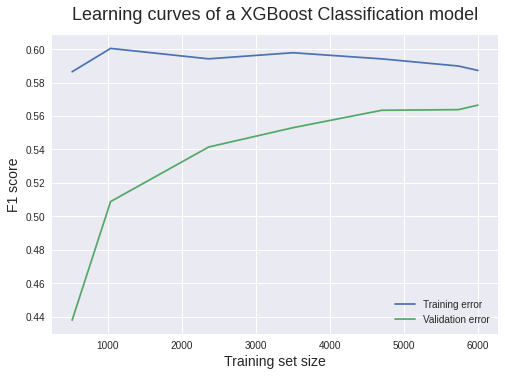

In [92]:
# Evaluation using learning curve
learning_plot("XGBoost", xgb_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
It seems to be overfit, but I think when using the full data the performance will be better.

In [93]:
# for better evaluation I will use classification report
print(classification_report(data_labels, xgb_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       374
           1       0.79      0.11      0.19       605
           2       0.44      0.44      0.44       740
           3       0.83      0.67      0.74       241
           4       0.73      0.79      0.76       233
           5       0.81      0.79      0.80       852
           6       0.51      0.45      0.48      1100
           7       0.91      0.92      0.92       346
           8       0.65      0.78      0.71      1055
           9       0.61      0.67      0.64      1100
          10       0.43      0.52      0.47      1100

    accuracy                           0.60      7746
   macro avg       0.67      0.63      0.62      7746
weighted avg       0.62      0.60      0.59      7746



In [94]:
# save results in csv file
xgd_test_score = f1_score(y_val, xgb_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["XGBoost"],  "F1 train score": [xgb_score], "F1 test score": [xgd_test_score]}), ignore_index = True)

In [95]:
results_in_csv

Algorithm  F1 train score  F1 test score
0  Decision Tree        0.455654       0.415007
1  Random Forest        0.537512       0.497242
2    Extra Trees        0.460241       0.412151
3            KNN        0.580936       0.440516
4            SVC        0.514018       0.469759
5     GaussianNB        0.411390       0.358697
6        XGBoost        0.587893       0.534919

### SGD Classifier model

In [96]:
# create an object the of SGD Classifier
sgd_obj = OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42))
# fit the training data on the training set
sgd_model= sgd_obj.fit(data_prepared, data_labels)
# compute the f1 score
sgd_score = f1_score(data_labels, sgd_model.predict(data_prepared), average= "weighted")
sgd_score

0.44959423228210615

In [97]:
# Evaluation using Cross-Validation
cross_val("SGD Classifier", sgd_model)


  SGD Classifier Classification Cross Validation Mean Result is: 0.4451432216799359
  SGD Classifier Classification Cross Validation Standard Deviation Result is: 0.02574163174418226
  SGD Classifier Classification Cross Validation Score Result is:
[0.46287754 0.46804855 0.45980383 0.43659815 0.39838805]


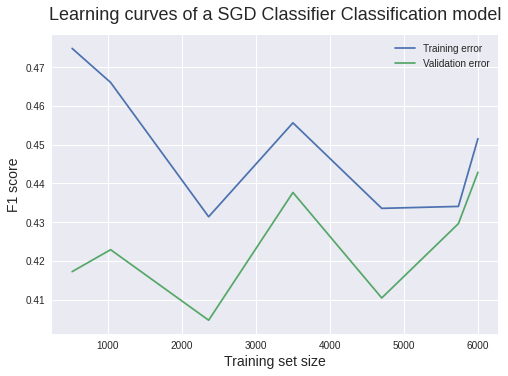

In [98]:
# Evaluation using learning curve
learning_plot("SGD Classifier", sgd_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is a fraction between overfit and not. I think it happened because of the type of the algorithm,\
but finally I think that there is no overfit using SGD.

In [99]:
# for better evaluation I will use classification report
print(classification_report(data_labels, sgd_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50       374
           1       0.00      0.00      0.00       605
           2       0.34      0.19      0.24       740
           3       0.58      0.59      0.59       241
           4       0.46      0.76      0.58       233
           5       0.73      0.52      0.61       852
           6       0.39      0.43      0.41      1100
           7       0.84      0.93      0.88       346
           8       0.56      0.75      0.64      1055
           9       0.41      0.60      0.49      1100
          10       0.30      0.34      0.32      1100

    accuracy                           0.47      7746
   macro avg       0.48      0.50      0.48      7746
weighted avg       0.45      0.47      0.45      7746



In [100]:
# save results in csv file
sgd_test_score = f1_score(y_val, sgd_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["SGD Classifier"],  "F1 train score": [sgd_score], "F1 test score": [sgd_test_score]}), ignore_index = True)

In [101]:
results_in_csv

Algorithm  F1 train score  F1 test score
0   Decision Tree        0.455654       0.415007
1   Random Forest        0.537512       0.497242
2     Extra Trees        0.460241       0.412151
3             KNN        0.580936       0.440516
4             SVC        0.514018       0.469759
5      GaussianNB        0.411390       0.358697
6         XGBoost        0.587893       0.534919
7  SGD Classifier        0.449594       0.415714

### Voting Classifier

In [102]:
vote1 = OneVsOneClassifier(RandomForestClassifier(n_estimators= 100, max_depth= 2, random_state= 42, max_features= 5))
vote2 = OneVsOneClassifier(XGBClassifier(learning_rate= 0.04, max_depth=2, n_estimators= 100, random_state= 42))
vote3 = SVC(kernel='rbf', decision_function_shape= 'ovo')
vote4 = OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42))
vote5 = OneVsOneClassifier(DecisionTreeClassifier(max_depth=3, max_features= 6, random_state= 42))
voting_model = VotingClassifier(estimators=[('rf', vote1), ('xgb', vote2), ('svc', vote3), ('sgd', vote4), ('dt', vote5)], voting='hard')
voting_clf = voting_model.fit(data_prepared, data_labels)
# compute the f1 score
voting_score = f1_score(data_labels, voting_clf.predict(data_prepared), average= "weighted")
voting_score

0.5472907329967085

In [103]:
# Evaluation using Cross-Validation
cross_val("Voting Classifier", voting_model)


  Voting Classifier Classification Cross Validation Mean Result is: 0.5289941553529124
  Voting Classifier Classification Cross Validation Standard Deviation Result is: 0.015923412225221763
  Voting Classifier Classification Cross Validation Score Result is:
[0.54230505 0.54175825 0.53123224 0.53099079 0.49868446]


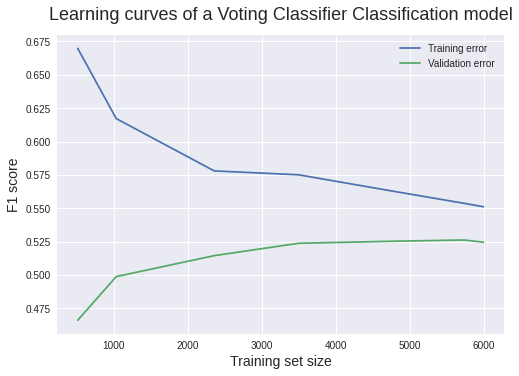

In [104]:
# Evaluation using learning curve
learning_plot("Voting Classifier", voting_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Voting Classifier.

In [105]:
# for better evaluation I will use classification report
print(classification_report(data_labels, voting_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       374
           1       0.00      0.00      0.00       605
           2       0.42      0.41      0.42       740
           3       0.82      0.70      0.76       241
           4       0.70      0.71      0.71       233
           5       0.78      0.74      0.76       852
           6       0.48      0.45      0.46      1100
           7       0.92      0.92      0.92       346
           8       0.64      0.78      0.70      1055
           9       0.51      0.68      0.58      1100
          10       0.39      0.43      0.41      1100

    accuracy                           0.57      7746
   macro avg       0.58      0.60      0.59      7746
weighted avg       0.53      0.57      0.55      7746



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [106]:
# save results in csv file
vot_test_score = f1_score(y_val, voting_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["Voting Classifier"],  "F1 train score": [voting_score], "F1 test score": [vot_test_score]}), ignore_index = True)

In [107]:
results_in_csv

Algorithm  F1 train score  F1 test score
0      Decision Tree        0.455654       0.415007
1      Random Forest        0.537512       0.497242
2        Extra Trees        0.460241       0.412151
3                KNN        0.580936       0.440516
4                SVC        0.514018       0.469759
5         GaussianNB        0.411390       0.358697
6            XGBoost        0.587893       0.534919
7     SGD Classifier        0.449594       0.415714
8  Voting Classifier        0.547291       0.493399

### Ada Boost Classifier model

In [108]:
ada_obj = OneVsOneClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=70, learning_rate=0.009, random_state=42))
ada_model = ada_obj.fit(data_prepared, data_labels)
# compute the f1 score
ada_score = f1_score(data_labels, ada_model.predict(data_prepared), average= "weighted")
ada_score

0.5636815207590532

In [109]:
# Evaluation using Cross-Validation
cross_val("AdaBoost Classifier", ada_model)


  AdaBoost Classifier Classification Cross Validation Mean Result is: 0.5448935416763048
  AdaBoost Classifier Classification Cross Validation Standard Deviation Result is: 0.013184876997005603
  AdaBoost Classifier Classification Cross Validation Score Result is:
[0.5638293  0.54863384 0.53747402 0.55001717 0.52451338]


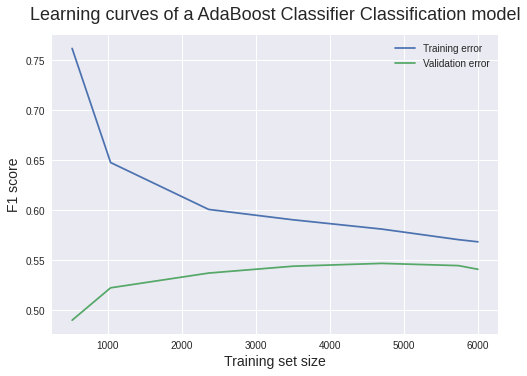

In [110]:
# Evaluation using learning curve
learning_plot("AdaBoost Classifier", ada_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No big overfit, but lately I saw that increasing the depth will increase the overfit.

In [111]:
# for better evaluation I will use classification report
print(classification_report(data_labels, ada_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.61      0.80      0.69       374
           1       0.82      0.12      0.21       605
           2       0.34      0.50      0.40       740
           3       0.78      0.66      0.71       241
           4       0.69      0.74      0.71       233
           5       0.72      0.78      0.75       852
           6       0.44      0.50      0.47      1100
           7       0.92      0.92      0.92       346
           8       0.64      0.75      0.69      1055
           9       0.68      0.59      0.63      1100
          10       0.46      0.37      0.41      1100

    accuracy                           0.58      7746
   macro avg       0.64      0.61      0.60      7746
weighted avg       0.60      0.58      0.56      7746



In [112]:
# save results in csv file
ada_test_score = f1_score(y_val, ada_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["AdaBoost Classifier"],  "F1 train score": [ada_score], "F1 test score": [ada_test_score]}), ignore_index = True)

In [113]:
results_in_csv

Algorithm  F1 train score  F1 test score
0        Decision Tree        0.455654       0.415007
1        Random Forest        0.537512       0.497242
2          Extra Trees        0.460241       0.412151
3                  KNN        0.580936       0.440516
4                  SVC        0.514018       0.469759
5           GaussianNB        0.411390       0.358697
6              XGBoost        0.587893       0.534919
7       SGD Classifier        0.449594       0.415714
8    Voting Classifier        0.547291       0.493399
9  AdaBoost Classifier        0.563682       0.501063

### Gradient Boosting Classsifier model

In [114]:
gb_obj = OneVsOneClassifier(GradientBoostingClassifier(learning_rate= 0.07, max_depth= 2, subsample= 0.25, n_estimators= 60, random_state= 42))
gb_model = gb_obj.fit(data_prepared, data_labels)
# compute the f1 score
gb_score = f1_score(data_labels, gb_model.predict(data_prepared), average= "weighted")
gb_score

0.6103529409621653

In [115]:
# Evaluation using Cross-Validation
cross_val("Gradient Boosting", gb_model)


  Gradient Boosting Classification Cross Validation Mean Result is: 0.5782957973782584
  Gradient Boosting Classification Cross Validation Standard Deviation Result is: 0.011464196471471417
  Gradient Boosting Classification Cross Validation Score Result is:
[0.59486091 0.58394283 0.57487537 0.57791614 0.55988375]


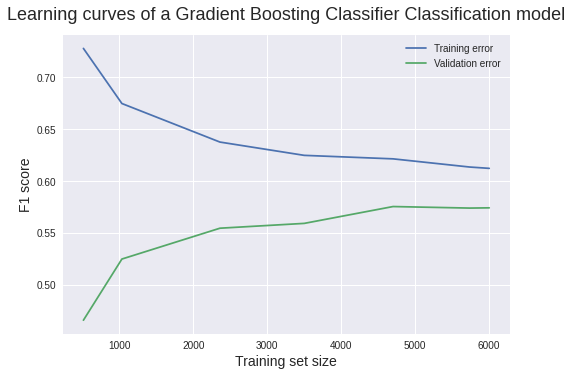

In [116]:
# Evaluation using learning curve
learning_plot("Gradient Boosting Classifier", gb_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is an overfit using Gradient Boosting (Not a big overfit).

In [117]:
# for better evaluation I will use classification report
print(classification_report(data_labels, gb_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       374
           1       0.76      0.12      0.21       605
           2       0.47      0.48      0.48       740
           3       0.85      0.73      0.79       241
           4       0.78      0.82      0.80       233
           5       0.79      0.82      0.81       852
           6       0.50      0.49      0.49      1100
           7       0.94      0.93      0.94       346
           8       0.65      0.80      0.72      1055
           9       0.67      0.68      0.67      1100
          10       0.46      0.53      0.49      1100

    accuracy                           0.62      7746
   macro avg       0.69      0.66      0.65      7746
weighted avg       0.64      0.62      0.61      7746



In [118]:
# save results in csv file
gb_test_score = f1_score(y_val, gb_model.predict(X_val_prepared), average= "weighted")
results_in_csv =results_in_csv.append(pd.DataFrame({"Algorithm": ["Gradient Boosting"],  "F1 train score": [gb_score], "F1 test score": [gb_test_score]}), ignore_index = True)

In [119]:
results_in_csv

Algorithm  F1 train score  F1 test score
0         Decision Tree        0.455654       0.415007
1         Random Forest        0.537512       0.497242
2           Extra Trees        0.460241       0.412151
3                   KNN        0.580936       0.440516
4                   SVC        0.514018       0.469759
5            GaussianNB        0.411390       0.358697
6               XGBoost        0.587893       0.534919
7        SGD Classifier        0.449594       0.415714
8     Voting Classifier        0.547291       0.493399
9   AdaBoost Classifier        0.563682       0.501063
10    Gradient Boosting        0.610353       0.548330

### Bagging Classifier

In [120]:
bag_object = BaggingClassifier(GradientBoostingClassifier(learning_rate= 0.05, max_depth= 2, n_estimators= 50, random_state= 42),
                               n_estimators=20, bootstrap=True, random_state=42)
bag_model= bag_object.fit(data_prepared, data_labels)
# compute the f1 score
bag_score = f1_score(data_labels, bag_model.predict(data_prepared), average= "weighted") 
bag_score

0.5888648214271636

In [121]:
# Evaluation using Cross-Validation
cross_val("Bagging Classifier", bag_model)


  Bagging Classifier Classification Cross Validation Mean Result is: 0.5715038450643435
  Bagging Classifier Classification Cross Validation Standard Deviation Result is: 0.01335260419842875
  Bagging Classifier Classification Cross Validation Score Result is:
[0.58470718 0.57795203 0.5753882  0.57358322 0.5458886 ]


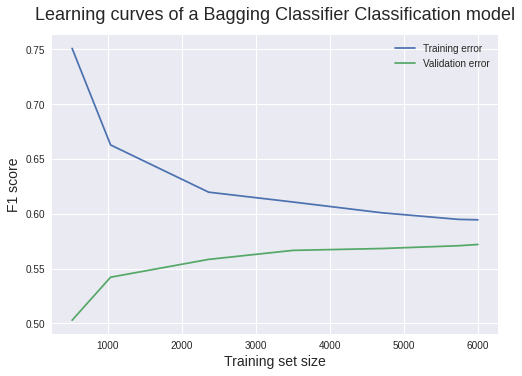

In [122]:
# Evaluation using learning curve
learning_plot("Bagging Classifier", bag_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Bagging classifier, but by increasing the data, I think the performance will improve.

In [123]:
# for better evaluation I will use classification report
print(classification_report(data_labels, bag_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       374
           1       0.96      0.13      0.22       605
           2       0.44      0.48      0.46       740
           3       0.78      0.58      0.66       241
           4       0.64      0.81      0.71       233
           5       0.77      0.78      0.78       852
           6       0.49      0.46      0.48      1100
           7       0.90      0.90      0.90       346
           8       0.67      0.77      0.71      1055
           9       0.67      0.65      0.66      1100
          10       0.43      0.54      0.48      1100

    accuracy                           0.60      7746
   macro avg       0.67      0.62      0.61      7746
weighted avg       0.63      0.60      0.59      7746



In [124]:
# save results in csv file
bag_test_score = f1_score(y_val, bag_model.predict(X_val_prepared), average= "weighted")
results_in_csv = results_in_csv.append(pd.DataFrame({"Algorithm": ["Bagging Classifier"],  "F1 train score": [bag_score], "F1 test score": [bag_test_score]}), ignore_index = True)

In [125]:
results_in_csv

Algorithm  F1 train score  F1 test score
0         Decision Tree        0.455654       0.415007
1         Random Forest        0.537512       0.497242
2           Extra Trees        0.460241       0.412151
3                   KNN        0.580936       0.440516
4                   SVC        0.514018       0.469759
5            GaussianNB        0.411390       0.358697
6               XGBoost        0.587893       0.534919
7        SGD Classifier        0.449594       0.415714
8     Voting Classifier        0.547291       0.493399
9   AdaBoost Classifier        0.563682       0.501063
10    Gradient Boosting        0.610353       0.548330
11   Bagging Classifier        0.588865       0.546606

### Logistic Regression

In [126]:
lg_obj = LogisticRegression(max_iter= 500, multi_class='multinomial', random_state=42)
lg_model = lg_obj.fit(data_prepared, data_labels)
# compute the f1 score
lg_score = f1_score(data_labels, lg_model.predict(data_prepared), average= "weighted") 
lg_score

0.4757966082540323

In [127]:
# Evaluation using Cross-Validation
cross_val("Logistic Regression", lg_model)


  Logistic Regression Classification Cross Validation Mean Result is: 0.4697326651806601
  Logistic Regression Classification Cross Validation Standard Deviation Result is: 0.01670659835383228
  Logistic Regression Classification Cross Validation Score Result is:
[0.48066653 0.48730045 0.46584707 0.47544272 0.43940656]


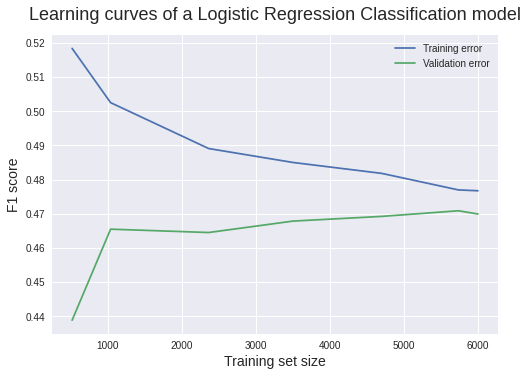

In [128]:
# Evaluation using learning curve
learning_plot("Logistic Regression", lg_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Logistic Regression.

In [129]:
# for better evaluation I will use classification report
print(classification_report(data_labels, lg_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       374
           1       0.00      0.00      0.00       605
           2       0.36      0.27      0.31       740
           3       0.65      0.54      0.59       241
           4       0.54      0.66      0.60       233
           5       0.69      0.69      0.69       852
           6       0.48      0.35      0.40      1100
           7       0.89      0.91      0.90       346
           8       0.58      0.78      0.67      1055
           9       0.42      0.55      0.48      1100
          10       0.31      0.39      0.34      1100

    accuracy                           0.50      7746
   macro avg       0.50      0.53      0.51      7746
weighted avg       0.46      0.50      0.48      7746



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [130]:
# save results in csv file
lg_test_score = f1_score(y_val, lg_model.predict(X_val_prepared), average= "weighted")
results_in_csv = results_in_csv.append(pd.DataFrame({"Algorithm": ["Logistic Regression"],  "F1 train score": [lg_score], "F1 test score": [lg_test_score]}), ignore_index = True)

In [131]:
results_in_csv

Algorithm  F1 train score  F1 test score
0         Decision Tree        0.455654       0.415007
1         Random Forest        0.537512       0.497242
2           Extra Trees        0.460241       0.412151
3                   KNN        0.580936       0.440516
4                   SVC        0.514018       0.469759
5            GaussianNB        0.411390       0.358697
6               XGBoost        0.587893       0.534919
7        SGD Classifier        0.449594       0.415714
8     Voting Classifier        0.547291       0.493399
9   AdaBoost Classifier        0.563682       0.501063
10    Gradient Boosting        0.610353       0.548330
11   Bagging Classifier        0.588865       0.546606
12  Logistic Regression        0.475797       0.439239

### Stacking Classifier

In [132]:
estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth= 2, random_state= 42, max_features= 5)),
              ('svr', SVC(random_state=42)),
              ('sgd', OneVsOneClassifier(SGDClassifier(penalty='l1', random_state=42)))]
stack_obj = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression(max_iter= 6000)
)
stack_model = stack_obj.fit(data_prepared, data_labels)
# compute the f1 score
stack_score = f1_score(data_labels, stack_model.predict(data_prepared), average= "weighted") 
stack_score

0.5087296655909822

In [133]:
# Evaluation using Cross-Validation
cross_val("Stacking Classifer", stack_model)


  Stacking Classifer Classification Cross Validation Mean Result is: 0.48339285195332227
  Stacking Classifer Classification Cross Validation Standard Deviation Result is: 0.01656102907737718
  Stacking Classifer Classification Cross Validation Score Result is:
[0.5014421  0.48688637 0.4905003  0.48598557 0.45214992]


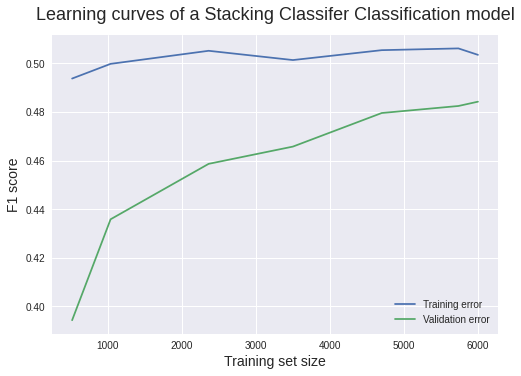

In [134]:
# Evaluation using learning curve
learning_plot("Stacking Classifer", stack_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Stacking Classifier, but by increasing the data, I think the performance will improve.

In [135]:
# for better evaluation I will use classification report
print(classification_report(data_labels, stack_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       374
           1       0.20      0.01      0.02       605
           2       0.39      0.35      0.37       740
           3       0.68      0.61      0.64       241
           4       0.55      0.75      0.64       233
           5       0.69      0.73      0.71       852
           6       0.49      0.42      0.46      1100
           7       0.88      0.91      0.89       346
           8       0.62      0.80      0.70      1055
           9       0.45      0.59      0.51      1100
          10       0.36      0.37      0.37      1100

    accuracy                           0.53      7746
   macro avg       0.54      0.56      0.54      7746
weighted avg       0.51      0.53      0.51      7746



In [136]:
# save results in csv file
stack_test_score = f1_score(y_val, stack_model.predict(X_val_prepared), average= "weighted")
results_in_csv = results_in_csv.append(pd.DataFrame({"Algorithm": ["Stacking Classifer"],  "F1 train score": [stack_score], "F1 test score": [stack_test_score]}), ignore_index = True)

In [137]:
results_in_csv

Algorithm  F1 train score  F1 test score
0         Decision Tree        0.455654       0.415007
1         Random Forest        0.537512       0.497242
2           Extra Trees        0.460241       0.412151
3                   KNN        0.580936       0.440516
4                   SVC        0.514018       0.469759
5            GaussianNB        0.411390       0.358697
6               XGBoost        0.587893       0.534919
7        SGD Classifier        0.449594       0.415714
8     Voting Classifier        0.547291       0.493399
9   AdaBoost Classifier        0.563682       0.501063
10    Gradient Boosting        0.610353       0.548330
11   Bagging Classifier        0.588865       0.546606
12  Logistic Regression        0.475797       0.439239
13   Stacking Classifer        0.508730       0.461541

### Hist Gradient Boosting

In [138]:
hgb_obj = HistGradientBoostingClassifier(learning_rate=0.1, max_depth= 2, max_iter= 100)
hgb_model = hgb_obj.fit(data_prepared, data_labels)
# compute the f1 score
hgb_score = f1_score(data_labels, hgb_model.predict(data_prepared), average= "weighted") 
hgb_score

0.6523983513358774

In [139]:
# Evaluation using Cross-Validation
cross_val("Hist Gradient Boosting", hgb_model)


  Hist Gradient Boosting Classification Cross Validation Mean Result is: 0.6075242185084878
  Hist Gradient Boosting Classification Cross Validation Standard Deviation Result is: 0.01529568753596344
  Hist Gradient Boosting Classification Cross Validation Score Result is:
[0.62571596 0.61212953 0.61193999 0.60854439 0.57929122]


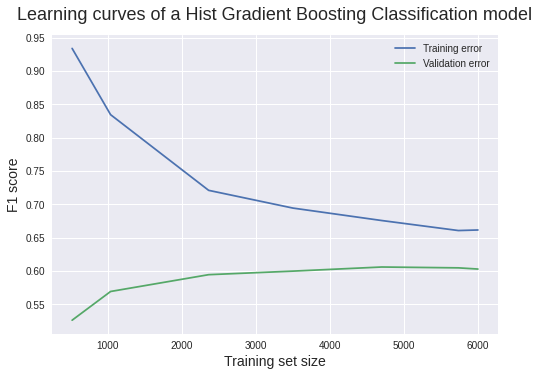

In [140]:
# Evaluation using learning curve
learning_plot("Hist Gradient Boosting", hgb_model, X= data_prepared, y= data_labels, scoring= 'f1_weighted', cv= 5)

**Discussion Stage**\
There is No overfit using Hist Gradient Boosting.

In [141]:
# for better evaluation I will use classification report
print(classification_report(data_labels, hgb_model.predict(data_prepared)))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       374
           1       0.91      0.14      0.25       605
           2       0.49      0.53      0.51       740
           3       0.87      0.85      0.86       241
           4       0.87      0.85      0.86       233
           5       0.84      0.85      0.84       852
           6       0.51      0.54      0.53      1100
           7       0.96      0.95      0.96       346
           8       0.69      0.83      0.75      1055
           9       0.73      0.71      0.72      1100
          10       0.51      0.58      0.54      1100

    accuracy                           0.67      7746
   macro avg       0.74      0.70      0.69      7746
weighted avg       0.69      0.67      0.65      7746



In [142]:
# save results in csv file
hgb_test_score = f1_score(y_val, hgb_model.predict(X_val_prepared), average= "weighted")
results_in_csv = results_in_csv.append(pd.DataFrame({"Algorithm": ["Hist Gradient Boosting"],  "F1 train score": [hgb_score], "F1 test score": [hgb_test_score]}), ignore_index = True)

In [143]:
results_in_csv

Algorithm  F1 train score  F1 test score
0            Decision Tree        0.455654       0.415007
1            Random Forest        0.537512       0.497242
2              Extra Trees        0.460241       0.412151
3                      KNN        0.580936       0.440516
4                      SVC        0.514018       0.469759
5               GaussianNB        0.411390       0.358697
6                  XGBoost        0.587893       0.534919
7           SGD Classifier        0.449594       0.415714
8        Voting Classifier        0.547291       0.493399
9      AdaBoost Classifier        0.563682       0.501063
10       Gradient Boosting        0.610353       0.548330
11      Bagging Classifier        0.588865       0.546606
12     Logistic Regression        0.475797       0.439239
13      Stacking Classifer        0.508730       0.461541
14  Hist Gradient Boosting        0.652398       0.579660

# Error Analysis

**Now it's time to see the variety of algorithm results is a graph**

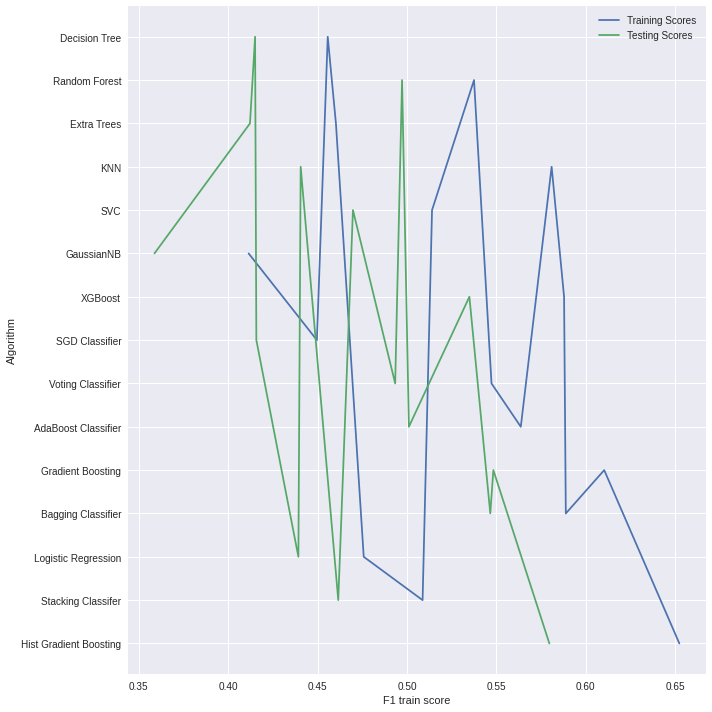

In [144]:
plt.figure(figsize=(10, 10))
# visualizing the training Scores of all the models
results_in_csv.sort_values(by=['F1 test score'], ascending= True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 train score'], label= "Training Scores", dashes=False, markers=True)
sns.lineplot(y= results_in_csv['Algorithm'], x= results_in_csv['F1 test score'], label= "Testing Scores", dashes=False, markers=True)
plt.yticks(range(len(results_in_csv['Algorithm'])))
plt.tight_layout()
plt.legend()
plt.show()

#### Analyze the Best Models and Their Errors

In [145]:
# check important features of the best model
# because of the best model in this situation "hg_reg_model" did not have feature_importances_ attribute I will use a second best parameter to perform analysis.
#feature_importances = xgb_model.feature_importances_
feature_importances = [] 
for clf in xgb_model.estimators_:
    feature_importances.append(clf.feature_importances_)
feature_importances = np.mean(feature_importances, axis=0)
display("## Forest Model" + "#"*100, sorted(zip(feature_importances, data_prepared_df.columns), reverse=True))
# for GaussionNB
imps = permutation_importance(nb_model, data_prepared, data_labels)
display("## GaussionNB " + "#"*100, sorted(zip(imps.importances_mean, data_prepared_df.columns), reverse=True))

'## Forest Model####################################################################################################'

[(0.47244427, 'duration_in min/ms'),
 (0.1153175, 'instrumentalness'),
 (0.104184605, 'acousticness'),
 (0.074118115, 'speechiness'),
 (0.073930964, 'energy'),
 (0.06742705, 'danceability'),
 (0.05883612, 'loudness'),
 (0.016879443, 'mode'),
 (0.009485516, '1'),
 (0.007376485, '2'),
 (0.0, '3'),
 (0.0, '0')]

'## GaussionNB ####################################################################################################'

[(0.1303640588690937, 'duration_in min/ms'),
 (0.07893106119287371, 'instrumentalness'),
 (0.07180480247869866, 'speechiness'),
 (0.05966950684224113, 'acousticness'),
 (0.048902659437128806, 'energy'),
 (0.04781822876323263, 'danceability'),
 (0.02496772527756258, 'loudness'),
 (0.007100438936225128, '1'),
 (0.005525432481280646, '2'),
 (0.0034340304673379563, '3'),
 (0.0016782855667440977, '0'),
 (0.0010844306738961862, 'mode')]

**Discussion Stage**\
This stage was iterabel stage, between different best models and chain feature elimination to get the best results.

## Deside which threshold you want to use find decision scores for all instances

In [146]:
# predict y scores on train set
y_scores = cross_val_predict(forest_obj, data_prepared, data_labels, cv=3, method="decision_function")
y_scores

array([[ 0.70344361,  5.76047599,  7.82703636, ...,  5.2666334 ,
         8.28613044, 10.29698921],
       [ 2.70517395,  6.78482611,  5.77867862, ..., 10.28980553,
         5.26998969,  8.29551598],
       [ 0.70301276,  5.75373774,  4.77424746, ..., 10.29222539,
         7.27969369,  9.29580112],
       ...,
       [ 2.71117433,  5.76693442,  7.86674538, ...,  4.24229454,
        10.29389397,  8.29353949],
       [ 9.77886114,  1.71598627,  4.74925629, ..., -0.10398954,
         7.28049413,  5.27675708],
       [ 2.70744264,  5.76612993,  7.84359438, ...,  4.2461482 ,
         9.28964833,  8.29278332]])

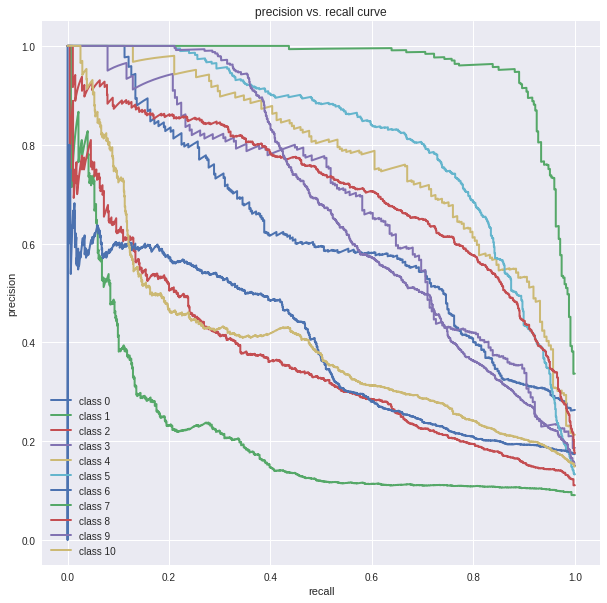

In [147]:
plt.figure(figsize= (10, 10))
# precision recall curve

n_classes = len(set(y_train))
Y = label_binarize(y_train, classes=[*range(n_classes)])

precision = dict()
recall = dict()
threshold = dict()

for i in range(n_classes):
    precision[i], recall[i], threshold[i] = precision_recall_curve(Y[:, i], y_scores[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

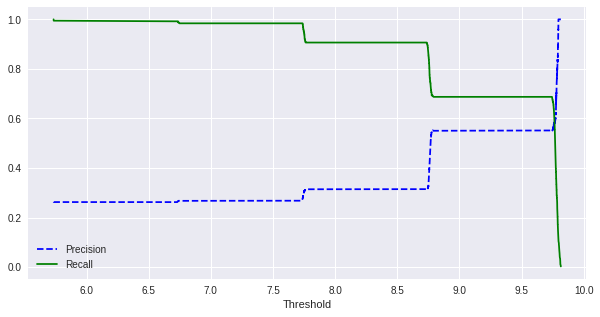

In [148]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(10,5))
  for i in range(n_classes):
    plt.plot(thresholds[i], precisions[i][:-1], "b--", label="Precision")
    plt.plot(thresholds[i], recalls[i][:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
    return plt.show()
# plot precision and recall depending of its threshold for a train set
plot_precision_recall_vs_threshold(precision, recall, threshold)

**Discussion Stage**\
This analysis was intended to analyze the model performance on different thresholds and use this analysis to improve the prediction of classes at certain thresholds as possible to determine whether it can be used.

## The ROC curve

In [149]:
# predict y scores on train set using the best classifier
roc_y_scores = cross_val_predict(stack_obj, data_prepared, data_labels, cv=3, method="decision_function")

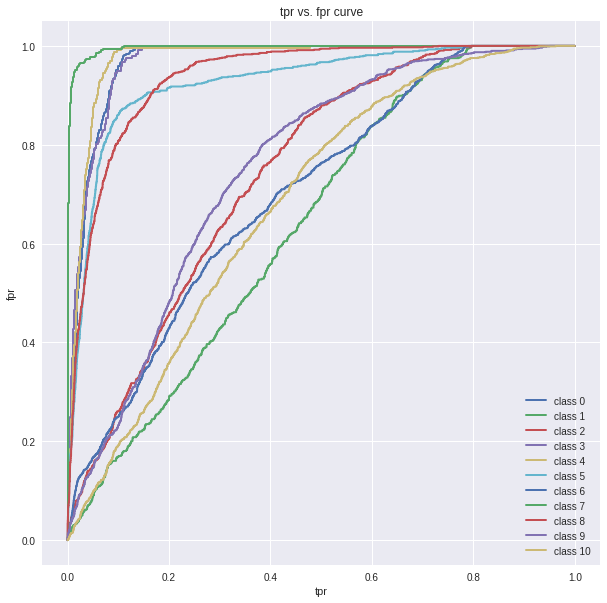

In [150]:
plt.figure(figsize= (10, 10))
# precision recall curve

n_classes = len(set(y_train))
Y = label_binarize(y_train, classes=[*range(n_classes)])

fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(n_classes):
    tpr[i], fpr[i], thresholds[i] = roc_curve(Y[:, i], roc_y_scores[:, i])
    plt.plot(tpr[i], fpr[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.legend(loc="best")
plt.title("tpr vs. fpr curve")
plt.show()

**Discussion Stage**\
This stage helps with a range of data and model decisions and tried on variant models.

## Confusion matrix analysis

<Figure size 720x720 with 0 Axes>

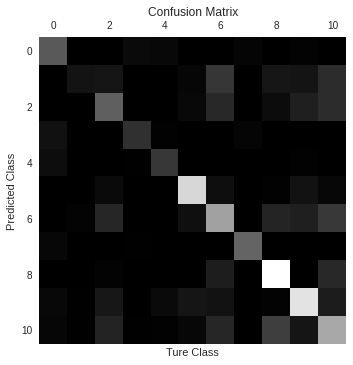

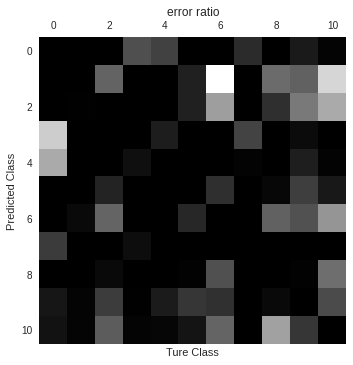

In [151]:
# analyse the best classifier using confusion matrix
error_analysis(gb_model, data_prepared, data_labels)

**Discussion Stage**\
The process of confusion matrix was Iterable and has a big role in the imbalanced data decisions.

## Features Selection

In [152]:
def chi2_selector(X, y, threshold=0.05): 
    '''
    This functions select features based on chi2_test statistic
    Arge:
    X -- features in the data must be pandas dataframe
    y -- target in the data
    return:
    chi2_selector -- a bool list
    chi2_feature -- names of features
    '''
    # scale features between 0 and 1
    X_norm = MinMaxScaler().fit_transform(X) 
    # select the features
    chi2_selector = chi2(X_norm, y)[1]< threshold
    # select the names of the features
    chi2_feature = X.columns[chi2_selector].to_list()
    return chi2_feature, chi2_selector

In [153]:
def f_classif_selector(X, y, threshold=0.05):
    '''
    This functions select features based on f_test statistic
    Arge:
    X -- features in the data must be pandas dataframe
    y -- target in the data
    return:
    f_classif_selector -- a bool list
    f_classif_feature -- names of features
    '''
    # scale features between 0 and 1
    X_norm = MinMaxScaler().fit_transform(X) 
    # select the features
    f_classif_selector = f_classif(X_norm, y)[1]< threshold
    # select the name of the features
    f_classif_feature = X.columns[f_classif_selector].to_list()
    return f_classif_feature, f_classif_selector

In [154]:
def rfe_selector(X, y, num_feats=8):
    ''' 
    This functions select features based on recursive feature elimination
    Arge:
    X -- features in the data must be pandas dataframe
    y -- target in the data
    return:
    selector -- a bool list
    feature -- names of features
    '''
    # scale features between 0 and 1
    X_norm = MinMaxScaler().fit_transform(X)
    # select the features
    rfe_selector = RFE(estimator=LogisticRegression(max_iter= 1000),
                       n_features_to_select=num_feats,
                       step=10,
                       verbose=5).fit(X_norm, y)
    rfe_selector = rfe_selector.get_support()
    # select the name of the features
    rfe_feature = X.loc[:,rfe_selector].columns.tolist()
    return rfe_feature, rfe_selector

In [155]:
def lasso_selector(X, y, num_feats=8):
    '''
    This functions select features based on lasso regulation logistic regression
    Arge:
    X -- features in the data must be pandas dataframe
    y -- target in the data
    return:
    selector -- a bool list
    feature -- names of features
    '''
    # scale features between 0 and 1
    X_norm = MinMaxScaler().fit_transform(X)
    # select the features
    embeded_lr_selector = SelectFromModel(
                                    LogisticRegression(max_iter= 1000, penalty="l1", solver="saga"),
                                    max_features=num_feats).fit(X_norm, y)
    lasso_selector = embeded_lr_selector.get_support()
    # select the name of the features
    lasso_feature = X.loc[:,lasso_selector].columns.tolist()
    return lasso_feature, lasso_selector

In [156]:
def feature_importances_selector(X, y, num_feats=8):
    '''
    This functions select features based on Important features of RandomForestClassifier
    Arge:
    X -- features in the data must be pandas dataframe
    y -- target in the data
    return:
    selector -- a bool list
    feature -- names of features
    '''
    # select the features
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100),
                                          max_features=num_feats).fit(X, y)
    features_importances_selector = embeded_rf_selector.get_support()
    # select the name of the features
    importances_feature = X.loc[:,features_importances_selector].columns.tolist()
    return importances_feature, features_importances_selector

In [157]:
#data_selec = framed_data.drop(["Artist Name", "Track Name", "Class"], axis=1)
data_selec= data_prepared_df
feature_selection_df = pd.DataFrame(
    {'Feature':data_selec.columns,
     'Chi-2':chi2_selector(data_selec, y_train)[1],
     'f_classif':f_classif_selector(data_selec, y_train)[1],
     'RFE':rfe_selector(data_selec, y_train)[1],
     'Logistics':lasso_selector(data_selec, y_train)[1],
     'Random Forest':feature_importances_selector(data_selec, y_train)[1]})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)

feature_selection_df.index = range(1, len(feature_selection_df)+1)

feature_selection_df

Fitting estimator with 12 features.


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Feature  Chi-2  f_classif    RFE  Logistics  Random Forest  \
1          speechiness   True       True   True       True           True   
2             loudness   True       True   True       True           True   
3     instrumentalness   True       True   True       True           True   
4               energy   True       True   True       True           True   
5   duration_in min/ms   True       True   True       True           True   
6         danceability   True       True   True       True           True   
7         acousticness   True       True   True       True           True   
8                 mode   True       True   True       True          False   
9                    3   True       True  False      False          False   
10                   2   True       True  False      False          False   
11                   1   True       True  False      False          False   
12                   0   True       True  False      False          False   

    Total  
1       5  
2       5  
3       5  
4       5  
5       5  
6       5  
7       5  
8       4  
9       2  
10      2  
11      2  
12      2

**Discussion Stage**\
We chose five feature selection techniques to find the best features:
1. Chi-2
2. f_classif 
3. REF(recursive feature elimination) 
4. lasso regulation logistic regression 
5. Important features of RandomForestClassifier

According to the table above, each feature was judged by the five feature selection techniques.We will identify the features that selected by three or more.

In [158]:
feature_selection_df[feature_selection_df["Total"]>=3]["Feature"].to_list()

['speechiness',
 'loudness',
 'instrumentalness',
 'energy',
 'duration_in min/ms',
 'danceability',
 'acousticness',
 'mode']

**Discussion Stage**\
The process of feature selection was iterabel to finally choose the best feature that affect the best performance without overfit.\
**This step is a recursive step**

**The features we will remove**

In [159]:
removed_features= feature_selection_df[feature_selection_df["Total"]<3]["Feature"].to_list()
removed_features

['3', '2', '1', '0']

**Discussion Stage**\
We tried polynomial features selector but no improve noticed (cause overfit).

# Parameters Choosing

## Halving Grid Search CV

### Random Forest Grid Search

In [160]:
param_grid = {'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [10, 50, 100, 200, 300]}

search = HalvingGridSearchCV(RandomForestClassifier() , param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(data_prepared, data_labels)

In [161]:
best_model_rnd = search.best_estimator_
best_model_rnd

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=300)

In [162]:
rnd_train_score_halving = f1_score(y_train, best_model_rnd.predict(data_prepared), average= "weighted")
rnd_test_score_halving = f1_score(y_val, best_model_rnd.predict(X_val_prepared), average= "weighted")
display(rnd_train_score_halving)
display(rnd_test_score_halving)

0.9318350352821638

0.568465850875782

### XGBoost Classifier Grid Search

In [163]:
param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

search = HalvingGridSearchCV(XGBClassifier(), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(data_prepared, data_labels)  

In [164]:
best_model_xgb = search.best_estimator_
best_model_xgb

XGBClassifier(max_depth=2, objective='multi:softprob')

In [165]:
xgb_train_score_halving = f1_score(y_train, best_model_xgb.predict(data_prepared), average= "weighted")
xgb_test_score_halving = f1_score(y_val, best_model_xgb.predict(X_val_prepared), average= "weighted")
display(xgb_train_score_halving)
display(xgb_test_score_halving)

0.6245318315247953

0.5684310902369928

### Hist Grid Boosting

In [166]:
param_grid = {'max_depth': range (2, 5, 2),
              'learning_rate': [0.1, 0.01, 0.05],
              'max_depth': [2, 3]}
search = HalvingGridSearchCV(HistGradientBoostingClassifier(), param_grid, resource='n_samples', max_resources= 'auto', random_state=42).fit(data_prepared, data_labels)  

In [167]:
best_model_hgb = search.best_estimator_
best_model_hgb

HistGradientBoostingClassifier(learning_rate=0.05, max_depth=3)

In [168]:
hgb_train_score_halving = f1_score(y_train, best_model_hgb.predict(data_prepared), average= "weighted")
hgb_test_score_halving = f1_score(y_val, best_model_hgb.predict(X_val_prepared), average= "weighted")
display(hgb_train_score_halving)
display(hgb_test_score_halving)

0.6543395335790302

0.5782021894769738

**Discussion Stage**\
We have to loop over these values to determine the best of it, then decide the best estimator taken the possibility of overfit into consideration, but this step will take long time depend on the parameters that I tried (using a specific range of values depends on elimination values recursively).

**Finally, we have to use the full data to train on and pass it to pipeline classes to evaluate preprocessing steps and get it ready to train and test on the best model.**

In [169]:
# remove 1000 random example from the data
full_rus = RandomUnderSampler(sampling_strategy= {9: 1100, 6: 1100, 10: 1100})
full_X_resampled, full_y_resampled = full_rus.fit_resample(framed_data.iloc[:, :-1], framed_data.iloc[:, -1])
# for convenient naming I will rename it to the original split name
full_X_train, full_y_train = full_X_resampled, full_y_resampled
# create shuffle seed
full_shuffle_index = np.random.permutation(len(full_X_train))
# shuffle samples
full_X_train, full_y_train = full_X_train.iloc[shuffle_index], full_y_train.iloc[full_shuffle_index]
# set final training data
full_training_data= full_X_train
# build final labels of the training set
data_labels= full_y_train.ravel()
# get numerical attributes
full_numerical_attribs = list(full_training_data.select_dtypes(exclude='object'))
# get categorical attributes
full_categorical_attribs = list(full_training_data.select_dtypes(include='object'))
# add time signature to categorical data
full_categorical_attribs+=['time_signature']
full_data_prepared = full_pipeline.fit_transform(full_training_data)

In [179]:
hgb_train_score_full = f1_score(y_train, best_model_hgb.predict(full_data_prepared), average= "weighted")
display(hgb_train_score_halving)
display(hgb_test_score_halving)

0.6543395335790302

0.5782021894769738

# Evaluate on Test set

Now it's time to evaluate the best model we built on the test set and save the final prediction to csv file

In [171]:
# # read test data from csv file and check the first 5 rows of it
# test_data= pd.read_csv("/content/test.csv")
# test_data.head()

In [172]:
# # for submission purpose I will clip Unnamed: 0 column in a single variable.
# submission= test_data[['id']].copy()

In [173]:
# # apply other transfomers to the test set
# test_prepared= full_pipeline.transform(test_data)
# test_prepared.shape

In [174]:
# # evaluate on the best algorithm, and best params.
# best_model= hgb_model

In [175]:
# # predict test set values
# test_pred= best_model.predict(test_prepared)

In [176]:
# # add the predicted values to the data frame
# submission['Class'] = test_pred
# # check the new dataframe
# submission

In [177]:
# # export the final submission dataframe to csv file
# submission.to_csv("submission1.csv", index= False)

In [178]:
# # read the new csv file
# pd.read_csv("submission1.csv")